In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from collections import Counter
# from scipy.stats import entropy
from tqdm.notebook import tqdm
from rdkit import Chem

pd.set_option('display.max_columns', None)  # or 1000

# Формирование базы данных PNP

In [2]:
path_pnpdb = '../side_sources/pnpdatabase/'


pnps = pd.read_csv(path_pnpdb + 'library.info', sep=' ', names=['mol_file', 'name', 'mass', 'num_aa', 'source'])
pnps.drop(columns=['source'], inplace=True)
LIB_SIZE = len(pnps)


smiles = []
with open(path_pnpdb + 'library.smiles', 'r') as file:
    for line in file:
        smiles.append(line.strip())

pnps['smile'] = smiles


formulas = []
pnp_graphs = []

with open(path_pnpdb + 'pnp_AAGraphs.txt', 'r') as file:
    for ind in pnps.index:
        _ = file.readline()
        
        _, _, formula, _, _, _ = file.readline().split()
        formulas.append(formula)
        
        _ = file.readline()
        *_, num_aa = file.readline().split()
        num_aa = int(num_aa)
        
        pnp = nx.MultiDiGraph()
        
        for i in range(num_aa):
            AA_id, AA_formula, AA_mass = file.readline().split()
            AA_id = int(AA_id)
            AA_mass = float(AA_mass)
            pnp.add_node(AA_id, formula=AA_formula, mass=AA_mass)
        
        *_, num_edges = file.readline().split()
        num_edges = int(num_edges)
        
        pnp_multiedges = False
        
        for i in range(num_edges):
            v1, bound, v2 = file.readline().split()
            assert bound == '-NC>'
            
            v1, v2 = int(v1), int(v2)
            if (v1, v2) in pnp.edges:
                pnp_multiedges = True
            pnp.add_edge(v1, v2)
        
        pnp.graph['multiedges'] = pnp_multiedges
        pnp_structure = file.readline()[:-1]
        pnp.graph['structure'] = pnp_structure
        
        pnp_graphs.append(pnp)

pnps['formula'] = formulas


inchikeys = []
inchis14 = []

for ind in pnps.index:
    try:
        inchikey = Chem.MolToInchiKey(Chem.MolFromMolFile(path_pnpdb + pnps.loc[ind, 'mol_file']))
        inchikeys.append(inchikey)
        inchis14.append(inchikey[:14])
    except:
        inchikeys.append(None)
        inchis14.append(None)

pnps['inchikey'] = inchikeys
pnps['inchi14'] = inchis14

RDKit ERROR: [19:26:36] Explicit valence for atom # 72 N, 4, is greater than permitted
[19:26:36] Explicit valence for atom # 72 N, 4, is greater than permitted
RDKit ERROR: [19:26:37] Explicit valence for atom # 64 N, 4, is greater than permitted
[19:26:37] Explicit valence for atom # 64 N, 4, is greater than permitted
RDKit ERROR: [19:26:37] Explicit valence for atom # 79 N, 4, is greater than permitted
[19:26:37] Explicit valence for atom # 79 N, 4, is greater than permitted
RDKit ERROR: [19:26:37] Explicit valence for atom # 71 N, 4, is greater than permitted
[19:26:37] Explicit valence for atom # 71 N, 4, is greater than permitted
RDKit ERROR: [19:26:37] Explicit valence for atom # 60 N, 4, is greater than permitted
[19:26:37] Explicit valence for atom # 60 N, 4, is greater than permitted
RDKit ERROR: [19:26:37] Explicit valence for atom # 39 N, 4, is greater than permitted
[19:26:37] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [19:26:38] Explicit v

In [3]:
pnps

,mol_file,name,mass,num_aa,smile,formula,inchikey,inchi14
0,mols/PKQ00-A.mol,Serratamolide_E_Serratamolide_E,486.294,4,CCCCCCCC1CC(=O)NC(CO)C(=O)OC(CCCCC)CC(=O)NC(CO...,C24H42N2O8,PTVPABPUSZNBMJ-UHFFFAOYSA-N,PTVPABPUSZNBMJ
1,mols/CJN00-R.mol,Isariins_Isariin_C,567.363,6,CCCCCCC1CC(=O)NCC(=O)NC(C(C)C)C(=O)NC(CC(C)C)C...,C28H49N5O7,YBUNWQZCPQUPOR-UHFFFAOYSA-N,YBUNWQZCPQUPOR
2,mols/CKL00-O.mol,Polyoxin_B_5-Carboxylic_acid,521.124,4,c1c(c(=O)[nH]c(=O)n1C1C(C(C(C(C(=O)O)NC(=O)C(C...,C17H23N5O14,JPFWJDMDPLEUBD-UHFFFAOYSA-N,JPFWJDMDPLEUBD
3,mols/QWO00-H.mol,"Ornibactin_C4_N5-De(acylhydroxyamino),_N5-nitr...",636.271,6,C(CCNC(=O)C(CCCN(C=O)O)NC(=O)C(CO)NC(=O)C(C(C(...,C23H40N8O13,SFTPYNFMHUKKSK-UHFFFAOYSA-N,SFTPYNFMHUKKSK
4,mols/KTY00-W.mol,Paliurine_G_Paliurine_G,647.368,4,CCC(C)C1C(=O)NC=Cc2cc(ccc2OC)OC2CCN(C2C(=O)N1)...,C36H49N5O6,UUEIAVQETUXPKR-UHFFFAOYSA-N,UUEIAVQETUXPKR
...,...,...,...,...,...,...,...,...
5016,mols/antimarin2012_32179.mol,Phenomycin,4638.460,45,N1(C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CNC(=O...,C201H332N62O64,PBPHUAKTDREHMY-UHFFFAOYSA-N,PBPHUAKTDREHMY
5017,mols/antimarin2012_28307.mol,"Plasminostreptin,_part_II",4935.330,42,N12C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=...,C222H331N55O67S3,QMLDWWQYUGBZGO-UHFFFAOYSA-N,QMLDWWQYUGBZGO
5018,mols/antimarin2012_36832.mol,Antifungal_protein;_AFP,5800.730,50,N1(C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=...,C252H398N68O73S8,UKCOZKUFIVAQJL-UHFFFAOYSA-N,UKCOZKUFIVAQJL
5019,mols/antimarin2012_28306.mol,"Plasminostreptin,_part_I",6443.160,65,C1(C(=O)N2C(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(...,C274H440N84O90S3,LRXZASMBAKHKIR-UHFFFAOYSA-N,LRXZASMBAKHKIR


In [4]:
pnps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mol_file  5021 non-null   object 
 1   name      5021 non-null   object 
 2   mass      5021 non-null   float64
 3   num_aa    5021 non-null   int64  
 4   smile     5021 non-null   object 
 5   formula   5021 non-null   object 
 6   inchikey  5004 non-null   object 
 7   inchi14   5004 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 313.9+ KB


# PNP structure analysis

In [14]:
structures = pd.DataFrame(columns=["default_structure", "my_structure"], index=range(LIB_SIZE))

In [15]:
def pnp_structure(pnp):
    nn = pnp.number_of_nodes()
    ne = pnp.number_of_edges()
    degs = [deg for node, deg in pnp.degree]
    c = Counter(degs)
    if pnp.graph['multiedges'] == False:
        pnp_copy = nx.Graph(pnp)
        if nx.is_isomorphic(pnp_copy, nx.cycle_graph(nn)): return 'cyclic'
        if nx.is_isomorphic(pnp_copy, nx.path_graph(nn)): return 'linear'
        if (nn == ne + 1):
            if nx.is_isomorphic(pnp_copy, nx.star_graph(nn - 1)): return 'star'
            return 'nontrivial tree'
        if (nn == ne):
            if c[1] == 1: return 'branch-cyclic'
            return 'poly-branch-cyclic'
        if (nn == ne - 1): return 'bicyclic'
        return 'complex'
    if (nn == ne) and (c[1] == 1): return 'branch-cyclic'
    if (nn == 2): return 'small'
    return 'complex'

In [16]:
for ind in pnps.index:
    pnp = pnp_graphs[ind]
    structures.loc[ind, "default_structure"] = pnp.graph["structure"]
    structures.loc[ind, "my_structure"] = pnp_structure(pnp)

In [17]:
structures

,default_structure,my_structure
0,cyclic,cyclic
1,cyclic,cyclic
2,branch-cyclic,branch-cyclic
3,linear,linear
4,branch-cyclic,linear
...,...,...
5016,linear,linear
5017,branch-cyclic,branch-cyclic
5018,linear,linear
5019,complex,poly-branch-cyclic


In [31]:
structures["index"] = structures.index
structures.groupby(['default_structure', 'my_structure']).count()

index
default_structure my_structure             
branch-cyclic     branch-cyclic        1110
                  linear                140
complex           bicyclic              481
                  complex               309
                  linear                 33
                  nontrivial tree       155
                  poly-branch-cyclic    245
                  star                   12
cyclic            cyclic               1257
linear            linear               1265
small             small                  14

# Статистики

In [17]:
edges.head(10)

,ID1,ID2,DeltaMZ,Cosine,Component,Note,structure_change
0,1109,1076,39.011,0.9258,1,C2HN,No
1,1041,8,39.011,0.9258,1,C2HN,No
2,1076,1041,0.000,0.8571,1,,No
3,1076,8,39.011,0.9258,1,C2HN,No
4,1109,1041,39.011,0.9258,1,C2HN,No
5,3412,1109,162.068,0.8165,1,,cyclic -> branch-cyclic
6,4604,4624,28.030,0.8889,2,CH2N:C2H4,No
7,4646,4656,14.010,0.7778,2,tertiary amine:N:methanol (-H2O):CH2,No
8,4561,4566,16.030,0.7778,2,NH2:primary amine:CH4,No
9,4647,4653,14.010,1.0000,2,tertiary amine:N:methanol (-H2O):CH2,No


## DeltaMZ distribution

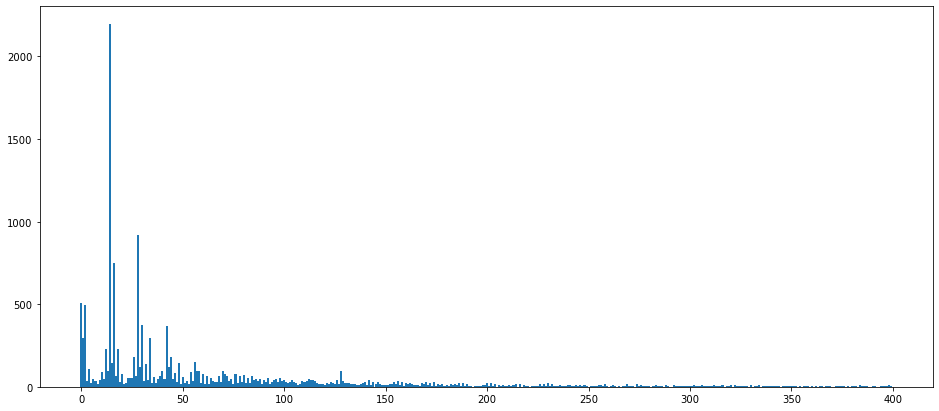

In [25]:
fig = plt.figure(figsize = (16, 7))
bin_sizes, _, _ = plt.hist(edges.DeltaMZ, bins=np.arange(-0.5, 400.5, 1))

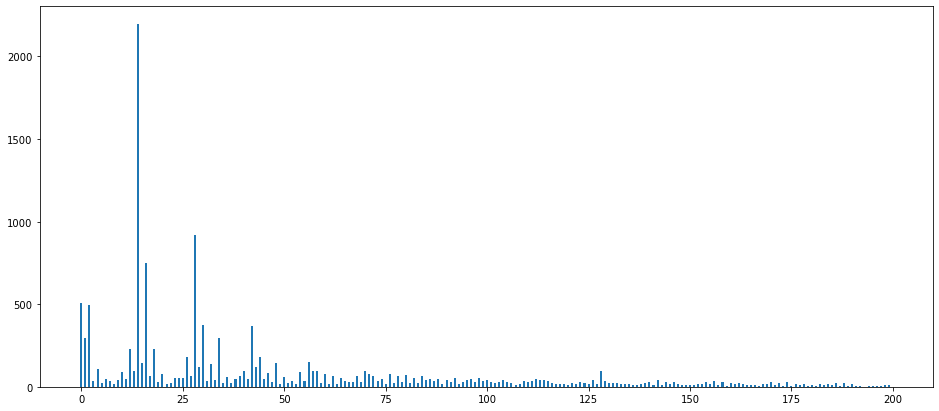

In [26]:
fig = plt.figure(figsize = (16, 7))
bin_sizes, _, _ = plt.hist(edges.DeltaMZ, bins=np.arange(-0.25, 200.25, 0.5))

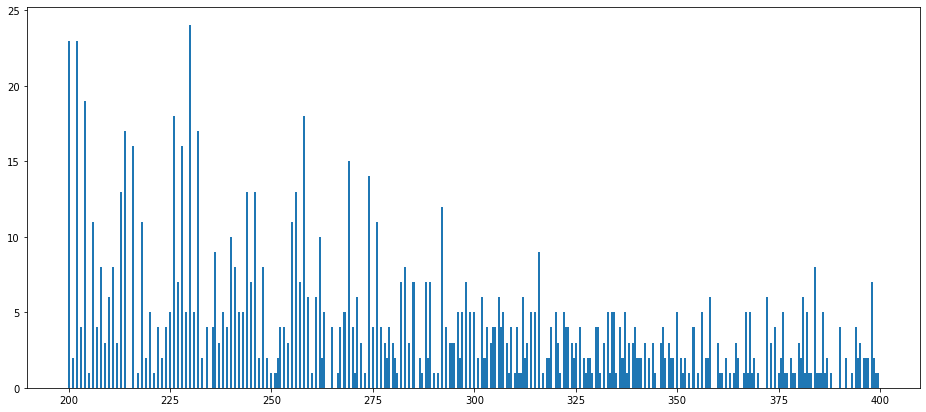

In [27]:
fig = plt.figure(figsize = (16, 7))
bin_sizes, _, _ = plt.hist(edges.DeltaMZ, bins=np.arange(199.75, 400.25, 0.5))

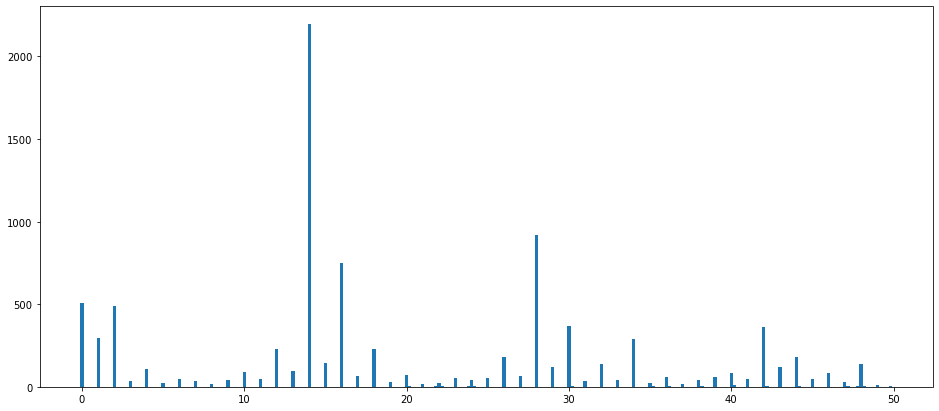

In [28]:
fig = plt.figure(figsize = (16, 7))
bin_sizes, _, _ = plt.hist(edges.DeltaMZ, bins=np.arange(-0.1, 50.1, 0.2))

In [29]:
DeltaMZ_distr = {}

for i in tqdm(np.arange(0, 1000, 0.02)):
    l = len(edges[abs(edges.DeltaMZ - i) < 0.01])
    if l > 0:
        DeltaMZ_distr[i] = l

DeltaMZ_distr

  0%|          | 0/50000 [00:00<?, ?it/s]

{0.0: 455,
 0.02: 25,
 0.04: 24,
 0.06: 1,
 0.08: 2,
 0.1: 1,
 0.96: 4,
 0.98: 133,
 1.0: 33,
 1.02: 1,
 1.04: 5,
 1.9000000000000001: 1,
 1.94: 6,
 1.96: 2,
 1.98: 136,
 2.0: 64,
 2.02: 240,
 2.04: 15,
 2.06: 1,
 2.94: 1,
 2.96: 1,
 2.98: 3,
 3.0: 7,
 3.02: 7,
 3.04: 14,
 3.06: 4,
 3.92: 2,
 3.94: 1,
 3.96: 4,
 3.98: 11,
 4.0: 46,
 4.0200000000000005: 22,
 4.04: 43,
 4.08: 1,
 4.94: 1,
 4.96: 9,
 4.98: 2,
 5.0: 2,
 5.0200000000000005: 4,
 5.04: 4,
 5.0600000000000005: 3,
 5.14: 1,
 5.9: 1,
 5.92: 5,
 5.94: 2,
 5.96: 18,
 5.98: 11,
 6.0200000000000005: 5,
 6.04: 3,
 6.08: 2,
 6.1000000000000005: 1,
 6.140000000000001: 1,
 6.94: 2,
 6.96: 20,
 6.98: 1,
 7.0: 3,
 7.0200000000000005: 6,
 7.0600000000000005: 3,
 7.12: 1,
 7.96: 6,
 7.98: 2,
 8.0: 6,
 8.040000000000001: 2,
 8.06: 5,
 8.96: 2,
 8.98: 5,
 9.0: 9,
 9.02: 7,
 9.040000000000001: 14,
 9.06: 8,
 9.9: 2,
 9.94: 1,
 9.96: 2,
 9.98: 29,
 10.0: 14,
 10.02: 41,
 10.040000000000001: 5,
 10.06: 3,
 10.08: 5,
 10.92: 2,
 10.94: 4,
 10.96:

In [30]:
DeltaMZ_distr_sort = sorted(DeltaMZ_distr.items(), key=lambda item: item[1], reverse=True)
DeltaMZ_distr_sort

[(14.02, 2079),
 (28.04, 776),
 (16.0, 604),
 (14.0, 565),
 (0.0, 455),
 (30.02, 259),
 (42.04, 251),
 (2.02, 240),
 (33.980000000000004, 165),
 (15.98, 159),
 (18.02, 140),
 (1.98, 136),
 (26.02, 136),
 (0.98, 133),
 (12.0, 129),
 (15.0, 100),
 (44.02, 100),
 (56.06, 96),
 (13.98, 93),
 (16.04, 93),
 (48.0, 82),
 (33.96, 80),
 (28.0, 76),
 (31.98, 65),
 (2.0, 64),
 (13.02, 62),
 (40.04, 59),
 (15.02, 58),
 (42.0, 54),
 (128.1, 53),
 (79.96000000000001, 52),
 (29.02, 47),
 (43.0, 47),
 (43.04, 47),
 (4.0, 46),
 (54.04, 46),
 (12.040000000000001, 45),
 (29.98, 45),
 (46.0, 45),
 (57.02, 44),
 (4.04, 43),
 (32.02, 42),
 (10.02, 41),
 (42.02, 41),
 (44.04, 41),
 (71.04, 41),
 (43.980000000000004, 40),
 (30.04, 38),
 (76.04, 38),
 (17.96, 37),
 (23.02, 35),
 (17.98, 34),
 (58.04, 34),
 (1.0, 33),
 (49.980000000000004, 33),
 (56.02, 32),
 (60.02, 31),
 (44.0, 30),
 (57.06, 30),
 (70.04, 30),
 (84.06, 30),
 (9.98, 29),
 (40.02, 29),
 (70.08, 29),
 (12.02, 28),
 (43.02, 28),
 (64.0, 28),
 (16

## In-class variance of the number of amino acids

In [29]:
AA_variance = []
min_cluster_size = 2

for cc in GNPS_ccs:
    a = np.array([GNPS.nodes[pnp_id]['structure'].number_of_nodes() for pnp_id in cc])
    size_, std_, min_, mean_, max_ = len(a), np.std(a), np.min(a), np.mean(a), np.max(a)
    if size_ < min_cluster_size:
        continue
    AA_variance.append([size_, std_, min_, mean_, max_])

AA_varinace = AA_variance.sort(key=lambda item : item[1], reverse=True)

print('Size | Std dev | Min |  Mean  | Max')
for line in AA_variance:
    print(f'{line[0]:4d} | {line[1]:7.3f} | {line[2]:3d} | {line[3]:6.3f} | {line[4]:3d}')

Size | Std dev | Min |  Mean  | Max
   3 |   3.399 |  15 | 19.667 |  23
   2 |   3.000 |  24 | 27.000 |  30
   2 |   2.500 |   8 | 10.500 |  13
   2 |   2.500 |  20 | 22.500 |  25
  11 |   2.339 |   5 |  8.273 |  11
  23 |   2.211 |   6 |  9.739 |  14
   3 |   2.160 |  10 | 13.000 |  15
   5 |   2.154 |   7 |  9.400 |  12
 551 |   2.112 |   3 |  5.909 |  11
   2 |   2.000 |   8 | 10.000 |  12
   2 |   2.000 |  15 | 17.000 |  19
   2 |   2.000 |  16 | 18.000 |  20
   8 |   1.900 |   5 |  6.125 |  11
   4 |   1.732 |   8 | 11.000 |  12
  39 |   1.693 |   8 | 10.487 |  13
   9 |   1.618 |   8 |  9.778 |  12
 164 |   1.590 |   3 |  5.549 |   9
  40 |   1.568 |  10 | 13.125 |  15
   2 |   1.500 |   5 |  6.500 |   8
   4 |   1.500 |   6 |  7.500 |   9
   2 |   1.500 |  18 | 19.500 |  21
   2 |   1.500 |   8 |  9.500 |  11
   2 |   1.500 |   6 |  7.500 |   9
   2 |   1.500 |  17 | 18.500 |  20
   3 |   1.414 |   6 |  8.000 |   9
  11 |   1.402 |   5 |  6.182 |   8
  19 |   1.398 |   5 |  7.21

   2 |   0.000 |  22 | 22.000 |  22
   4 |   0.000 |  15 | 15.000 |  15
   4 |   0.000 |  23 | 23.000 |  23
   2 |   0.000 |  20 | 20.000 |  20
   2 |   0.000 |  23 | 23.000 |  23
   2 |   0.000 |  26 | 26.000 |  26
   2 |   0.000 |  20 | 20.000 |  20
   2 |   0.000 |  20 | 20.000 |  20


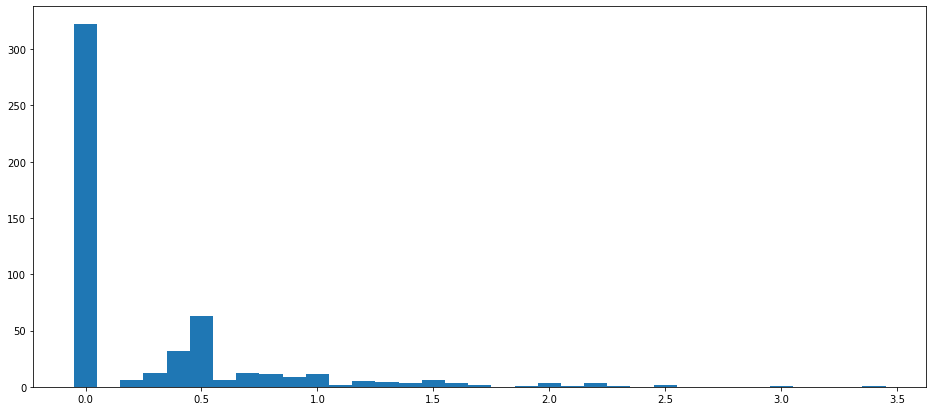

In [30]:
fig = plt.figure(figsize = (16, 7))
bin_sizes, _, _ = plt.hist([line[1] for line in AA_variance], bins=np.arange(-0.05, 3.55, 0.1))

# PNP compare

In [ ]:
# pnp_compare() TESTING

pnp1 = GNPS.nodes[5]['structure']
pnp2 = GNPS.nodes[55]['structure']
print(GNPS.adj[5])
print(pnp1.graph)
print(pnp2.graph)

AA_set1 = Counter([pnp1.nodes[AA]['formula'] for AA in pnp1.nodes()])
AA_set2 = Counter([pnp2.nodes[AA]['formula'] for AA in pnp2.nodes()])
gone_AA = AA_set1 - AA_set2
gain_AA = AA_set2 - AA_set1
print(set(gone_AA), 'replaced by', set(gain_AA))
print(len(gone_AA))
print(nx.is_isomorphic(pnp1, pnp2))

pnp1.nodes()

In [83]:
def pnp_describe(pnp): # return: size, mass, formula, AA counter, AA mass counter
    n = pnp.number_of_nodes()
    m = pnp.graph['mass']
    f = pnp.graph['formula']
    AA_set = Counter([pnp.nodes[AA]['formula'] for AA in pnp.nodes()])
    AA_mass = Counter([pnp.nodes[AA]['mass'] for AA in pnp.nodes()])
    return n, m, f, AA_set, AA_mass

def pnp_compare(pnp1, pnp2):
    n1, m1, f1, AA_set1, AA_mass1 = pnp_describe(pnp1)
    n2, m2, f2, AA_set2, AA_mass2 = pnp_describe(pnp2)
    gone_AA = AA_set1 - AA_set2
    gain_AA = AA_set2 - AA_set1
    gone_AA_mass = AA_mass1 - AA_mass2
    gain_AA_mass = AA_mass2 - AA_mass1
    return gone_AA_mass, gain_AA_mass

In [19]:
edges['GoneAA_mass'] = None
edges['GainAA_mass'] = None

for i in tqdm(range(len(edges))):
    id1, id2 = edges.loc[i, ['ID1', 'ID2']]
    pnp1 = GNPS.nodes[id1]['structure']
    pnp2 = GNPS.nodes[id2]['structure']
    gone, gain = pnp_compare(pnp1, pnp2)
    if (sum(gone.values()) == 1) and (sum(gain.values()) == 1):
        edges.loc[i, 'GoneAA_mass'] = list(gone)[0]
        edges.loc[i, 'GainAA_mass'] = list(gain)[0]
    
    if (sum(gone.values()) == 0) and (sum(gain.values()) == 0):
        edges.loc[i, 'GoneAA_mass'] = 0
        edges.loc[i, 'GainAA_mass'] = 0

edges

  0%|          | 0/14909 [00:00<?, ?it/s]

,ID1,ID2,DeltaMZ,Cosine,Component,Note,structure_change,GoneAA_mass,GainAA_mass
0,1109,1076,39.011,0.9258,1,C2HN,No,147.068,186.079
1,1041,8,39.011,0.9258,1,C2HN,No,147.068,186.079
2,1076,1041,0.000,0.8571,1,,No,0,0
3,1076,8,39.011,0.9258,1,C2HN,No,147.068,186.079
4,1109,1041,39.011,0.9258,1,C2HN,No,147.068,186.079
...,...,...,...,...,...,...,...,...,...
14904,89,302,594.234,0.8165,520,,linear -> bicyclic,None,None
14905,1117,1115,2.016,1.0000,521,H2,No,184.064,186.079
14906,572,3075,14.020,1.0000,522,methanol (-H2O):CH2,No,197.191,211.206
14907,572,3111,28.030,0.9545,522,CH2N:C2H4,No,197.191,225.222


## One AA modifications

In [20]:
one_mod = edges[(edges.GoneAA_mass > 0) & (edges.GainAA_mass > 0)]

In [21]:
one_mod.groupby(['structure_change']).count()

,ID1,ID2,DeltaMZ,Cosine,Component,Note,GoneAA_mass,GainAA_mass
structure_change,,,,,,,,
No,6326,6326,6326,6326,6326,6326,6326,6326
branch-cyclic -> linear,7,7,7,7,7,7,7,7
complex -> branch-cyclic,13,13,13,13,13,13,13,13


In [22]:
one_mod[one_mod.structure_change != 'No']

,ID1,ID2,DeltaMZ,Cosine,Component,Note,structure_change,GoneAA_mass,GainAA_mass
6786,1458,1572,2.015,0.7559,33,H2,branch-cyclic -> linear,100.04,102.056
8300,3956,1096,16.020,0.8889,62,NH2:primary amine:CH4,complex -> branch-cyclic,84.0211,100.04
8382,3956,996,17.010,0.8889,62,OH,complex -> branch-cyclic,84.0211,101.024
8410,2201,2166,17.000,0.9167,62,OH,complex -> branch-cyclic,84.0211,101.024
8422,3956,1062,46.030,0.8889,62,CH4NO:H4N3:C2H6O,complex -> branch-cyclic,84.0211,130.05
8427,2201,395,45.000,0.9167,62,CHO2:HN2O,complex -> branch-cyclic,84.0211,129.019
8433,3956,960,45.000,0.8889,62,CHO2:HN2O,complex -> branch-cyclic,84.0211,129.019
10664,4079,1325,89.030,0.8889,94,,branch-cyclic -> linear,27.9949,117.019
10672,4079,790,73.030,0.8889,94,CH3N3O:C3H5O2:C2H5N2O,branch-cyclic -> linear,27.9949,101.024
10713,2828,1663,18.011,0.8367,95,H2O,branch-cyclic -> linear,83.0371,101.048


{'file': 'mols/antimarin2012_33182.mol', 'name': 'Pyoverdin_Pf_3/4/3', 'formula': 'C49H71N14O18', 'mass': 1143.51, 'multiedges': True, 'structure': 'complex'}
{'file': 'mols/POG27-R.mol', 'name': 'Pyoverdin_Pf_Pyoverdin_Pf_2/2/1', 'formula': 'C49H72N14O19', 'mass': 1160.51, 'multiedges': False, 'structure': 'branch-cyclic'}
(9, 1143.51, 'C49H71N14O18', Counter({'C3H5NO2': 2, 'C6H10N2O3': 2, 'C13H11N3O3': 1, 'C6H11N2O': 1, 'C4H4O2': 1, 'C6H12N2O': 1, 'C2H3NO': 1}), Counter({87.032: 2, 158.069: 2, 257.08: 1, 127.087: 1, 84.0211: 1, 128.095: 1, 57.0215: 1}))
(9, 1160.51, 'C49H72N14O19', Counter({'C6H10N2O3': 2, 'C3H5NO2': 2, 'C6H12N2O': 1, 'C6H11N2O': 1, 'C4H5O3': 1, 'C13H11N3O3': 1, 'C2H3NO': 1}), Counter({158.069: 2, 87.032: 2, 128.095: 1, 127.087: 1, 101.024: 1, 257.08: 1, 57.0215: 1}))


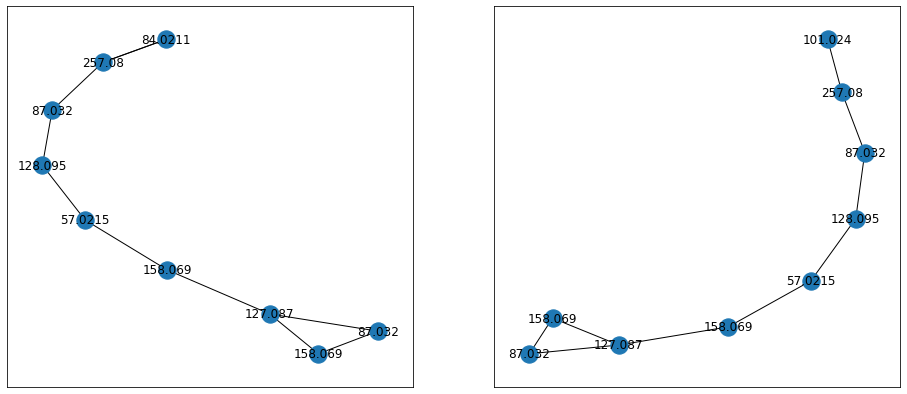

In [35]:
# TEMPORARY

pnp1 = GNPS.nodes[3956]['structure']
pnp2 = GNPS.nodes[996]['structure']

print(pnp1.graph)
print(pnp2.graph)
print(pnp_describe(pnp1))
print(pnp_describe(pnp2))

fig = plt.figure(figsize = (16, 7))
l1 = {}
l2 = {}
for i in range(pnp1.number_of_nodes()):
    l1[i] = pnp1.nodes[i]['mass']
    l2[i] = pnp2.nodes[i]['mass']
subax1 = plt.subplot(121)
nx.draw_networkx(pnp1, labels=l1)
subax2 = plt.subplot(122)
nx.draw_networkx(pnp2, labels=l2)
plt.show()

In [23]:
one_mod['changed_AA_degree'] = None

for index, row in one_mod.iterrows():
    id1, id2 = row[['ID1', 'ID2']]
    pnp1 = GNPS.nodes[id1]['structure']
    pnp2 = GNPS.nodes[id2]['structure']
    gone, gain = row[['GoneAA_mass', 'GainAA_mass']]
    *_, AA_mass1 = pnp_describe(pnp1)
    *_, AA_mass2 = pnp_describe(pnp2)
    if AA_mass1[gone] == 1:
        for i in range(pnp1.number_of_nodes()):
            if pnp1.nodes[i]['mass'] == gone:
                one_mod.loc[index, 'changed_AA_degree'] = -pnp1.degree[i]
    if AA_mass2[gain] == 1:
        for i in range(pnp2.number_of_nodes()):
            if pnp2.nodes[i]['mass'] == gain:
                one_mod.loc[index, 'changed_AA_degree'] = pnp2.degree[i]   

one_mod.head(10)

/tmp/ipykernel_22374/4251961399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_mod['changed_AA_degree'] = None
/home/nikitos/Programs/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,ID1,ID2,DeltaMZ,Cosine,Component,Note,structure_change,GoneAA_mass,GainAA_mass,changed_AA_degree
0,1109,1076,39.011,0.9258,1,C2HN,No,147.068,186.079,2
1,1041,8,39.011,0.9258,1,C2HN,No,147.068,186.079,-2
3,1076,8,39.011,0.9258,1,C2HN,No,147.068,186.079,-2
4,1109,1041,39.011,0.9258,1,C2HN,No,147.068,186.079,2
7,4646,4656,14.010,0.7778,2,tertiary amine:N:methanol (-H2O):CH2,No,85.0528,99.0684,None
9,4647,4653,14.010,1.0000,2,tertiary amine:N:methanol (-H2O):CH2,No,85.0528,99.0684,None
10,4647,4656,14.010,1.0000,2,tertiary amine:N:methanol (-H2O):CH2,No,85.0528,99.0684,None
11,4710,4717,14.020,1.0000,2,tertiary amine:N:methanol (-H2O):CH2,No,85.0528,99.0684,None
13,4614,4627,14.020,0.8333,2,tertiary amine:N:methanol (-H2O):CH2,No,99.0684,113.084,None
15,4584,4575,2.020,1.0000,2,H2,No,100.076,102.092,1


In [24]:
one_mod.groupby(['changed_AA_degree', 'structure_change'], dropna=False).count()

ID1   ID2  DeltaMZ  Cosine  \
changed_AA_degree structure_change                                        
-3.0              No                           1     1        1       1   
-2.0              No                         427   427      427     427   
-1.0              No                          26    26       26      26   
 1.0              No                        1816  1816     1816    1816   
                  branch-cyclic -> linear      5     5        5       5   
                  complex -> branch-cyclic    13    13       13      13   
 2.0              No                        3216  3216     3216    3216   
                  branch-cyclic -> linear      2     2        2       2   
 3.0              No                         193   193      193     193   
 4.0              No                          73    73       73      73   
 5.0              No                           1     1        1       1   
 6.0              No                           3     3        3       3   
 8.0              No                           1     1        1       1   
 NaN              No                         569   569      569     569   

                                            Component  Note  GoneAA_mass  \
changed_AA_degree structure_change                                         
-3.0              No                                1     1            1   
-2.0              No                              427   427          427   
-1.0              No                               26    26           26   
 1.0              No                             1816  1816         1816   
                  branch-cyclic -> linear           5     5            5   
                  complex -> branch-cyclic         13    13           13   
 2.0              No                             3216  3216         3216   
                  branch-cyclic -> linear           2     2            2   
 3.0              No                              193   193          193   
 4.0              No                               73    73           73   
 5.0              No                                1     1            1   
 6.0              No                                3     3            3   
 8.0              No                                1     1            1   
 NaN              No                              569   569          569   

                                            GainAA_mass  
changed_AA_degree structure_change                       
-3.0              No                                  1  
-2.0              No                                427  
-1.0              No                                 26  
 1.0              No                               1816  
                  branch-cyclic -> linear             5  
                  complex -> branch-cyclic           13  
 2.0              No                               3216  
                  branch-cyclic -> linear             2  
 3.0              No                                193  
 4.0              No                                 73  
 5.0              No                                  1  
 6.0              No                                  3  
 8.0              No                                  1  
 NaN              No                                569

## Modifications with zero mass change

In [25]:
invisible_mods = edges[(edges.GoneAA_mass == 0) & (edges.GainAA_mass == 0)]
invisible_mods = invisible_mods.drop(columns=['GoneAA_mass', 'GainAA_mass'])

In [26]:
invisible_mods.groupby(['structure_change']).count()

,ID1,ID2,DeltaMZ,Cosine,Component,Note
structure_change,,,,,,
No,139,139,139,139,139,139


In [27]:
invisible_mods = invisible_mods.drop(columns=['structure_change'])

In [28]:
def AA_mass_match(n1, n2):
    return n1['mass'] == n2['mass']

for index, row in invisible_mods.iterrows():
    id1, id2 = row[['ID1', 'ID2']]
    pnp1 = GNPS.nodes[id1]['structure']
    pnp2 = GNPS.nodes[id2]['structure']
    invisible_mods.loc[index, 'isomorphism'] = nx.is_isomorphic(pnp1, pnp2, node_match=AA_mass_match)

invisible_mods

,ID1,ID2,DeltaMZ,Cosine,Component,Note,isomorphism
2,1076,1041,0.0,0.8571,1,,False
12,4578,4575,0.0,0.8889,2,,False
40,4647,4645,0.0,0.8889,2,,False
56,4718,4717,0.0,0.8333,2,,False
57,4566,4559,0.0,0.8333,2,,False
...,...,...,...,...,...,...,...
13976,4303,4300,0.0,0.7692,289,,False
14445,3507,2528,0.0,1.0000,349,,True
14659,5011,1172,0.0,0.8416,412,,False
14696,3041,2110,0.0,0.9364,428,,False


In [29]:
invisible_mods.groupby(['isomorphism']).count()

,ID1,ID2,DeltaMZ,Cosine,Component,Note
isomorphism,,,,,,
False,137,137,137,137,137,137
True,2,2,2,2,2,2


{'file': 'mols/QYK92-E.mol', 'name': 'Xantholysin_A_Xantholysin_A', 'formula': 'C84H146N18O23', 'mass': 1775.08, 'multiedges': False, 'structure': 'branch-cyclic'}
{'file': 'mols/QYL64-C.mol', 'name': 'Antibiotic_MA_026_Antibiotic_MA_026', 'formula': 'C84H146N18O23', 'mass': 1775.08, 'multiedges': False, 'structure': 'branch-cyclic'}
(15, 1775.08, 'C84H146N18O23', Counter({'C6H11NO': 6, 'C5H8N2O2': 4, 'C5H9NO': 2, 'C10H19O2': 1, 'C5H7NO3': 1, 'C3H4NO2': 1}), Counter({113.084: 6, 128.059: 4, 99.0684: 2, 171.139: 1, 129.043: 1, 86.0242: 1}))
(15, 1775.08, 'C84H146N18O23', Counter({'C6H11NO': 6, 'C5H8N2O2': 4, 'C5H9NO': 2, 'C10H19O2': 1, 'C5H7NO3': 1, 'C3H4NO2': 1}), Counter({113.084: 6, 128.059: 4, 99.0684: 2, 171.139: 1, 129.043: 1, 86.0242: 1}))


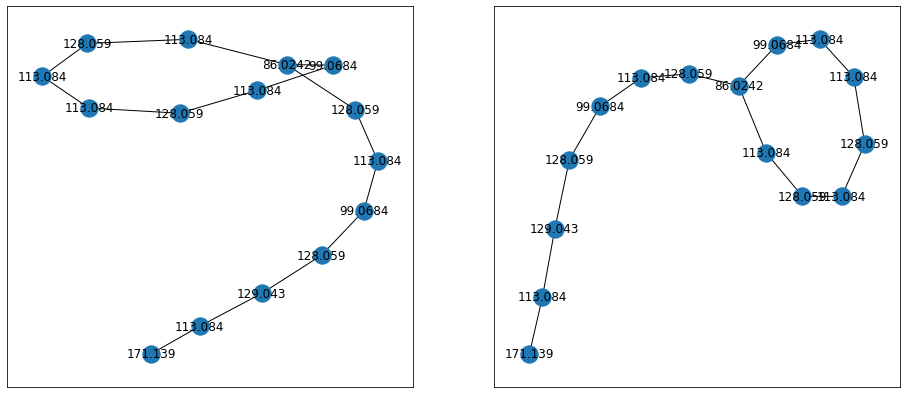

In [32]:
# TEMPORARY

pnp1 = GNPS.nodes[3041]['structure']
pnp2 = GNPS.nodes[2110]['structure']

print(pnp1.graph)
print(pnp2.graph)
print(pnp_describe(pnp1))
print(pnp_describe(pnp2))

fig = plt.figure(figsize = (16, 7))
l1 = {}
l2 = {}
for i in range(pnp1.number_of_nodes()):
    l1[i] = pnp1.nodes[i]['mass']
    l2[i] = pnp2.nodes[i]['mass']
subax1 = plt.subplot(121)
nx.draw_networkx(pnp1, labels=l1)
subax2 = plt.subplot(122)
nx.draw_networkx(pnp2, labels=l2)
plt.show()

### 

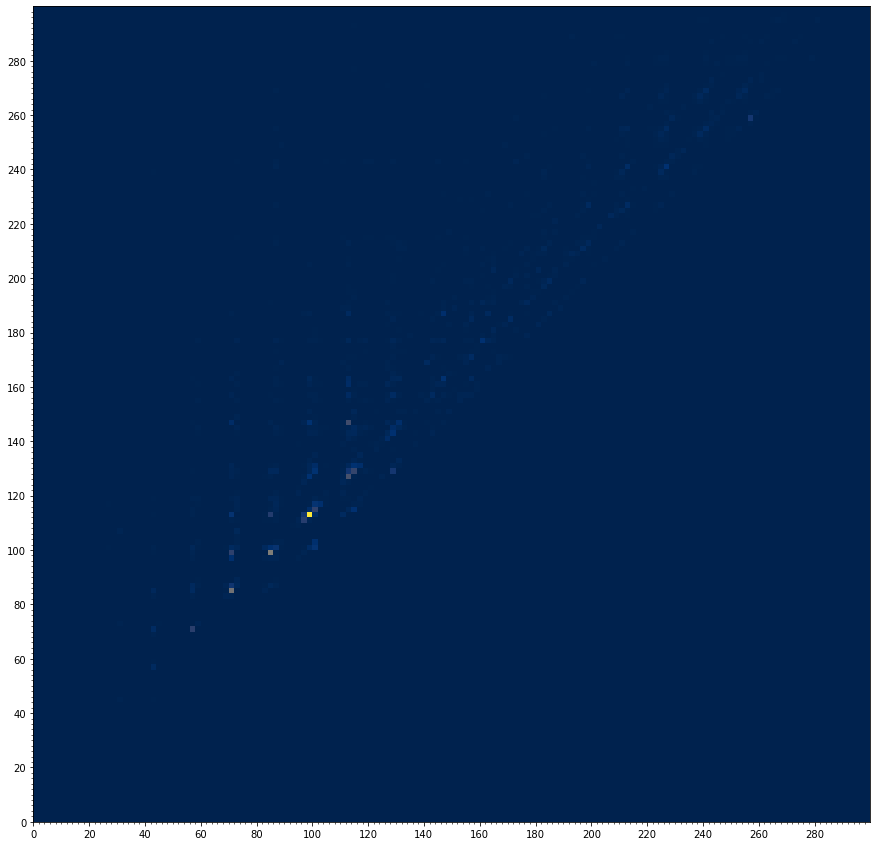

In [30]:
xmin, xmax = 0, 300
ymin, ymax = 0, 300
xstep = ystep = 2

fig = plt.figure(figsize = ((xmax - xmin) // 20, (ymax - ymin) // 20))
ax = fig.add_subplot()
xmajor_ticks = np.arange(xmin, xmax, 10 * xstep)
xminor_ticks = np.arange(xmin, xmax, xstep)
ymajor_ticks = np.arange(ymin, ymax, 10 * ystep)
yminor_ticks = np.arange(ymin, ymax, ystep)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

plt.hist2d(one_mod.GoneAA_mass, one_mod.GainAA_mass,
           bins=[(xmax - xmin) // xstep, (ymax - ymin) // ystep],
           range=[[xmin, xmax], [ymin, ymax]], cmap='cividis')
plt.show()

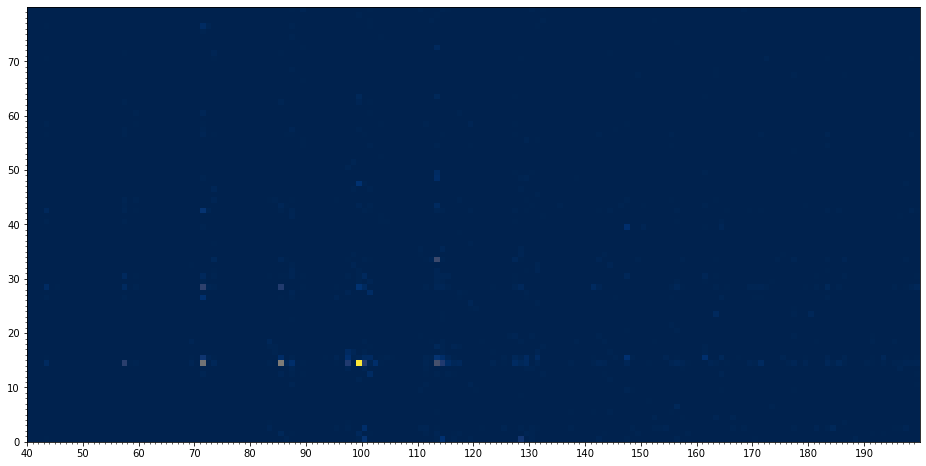

In [31]:
xmin, xmax = 40, 200
ymin, ymax = 0, 80
xstep = ystep = 1

fig = plt.figure(figsize = ((xmax - xmin) // 10, (ymax - ymin) // 10))
ax = fig.add_subplot()
xmajor_ticks = np.arange(xmin, xmax, 10 * xstep)
xminor_ticks = np.arange(xmin, xmax, xstep)
ymajor_ticks = np.arange(ymin, ymax, 10 * ystep)
yminor_ticks = np.arange(ymin, ymax, ystep)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

plt.hist2d(one_mod.GoneAA_mass, one_mod.GainAA_mass - one_mod.GoneAA_mass,
           bins=[(xmax - xmin) // xstep, (ymax - ymin) // ystep],
           range=[[xmin, xmax], [ymin, ymax]], cmap='cividis')
plt.show()

In [32]:
AA_changing = []
for i in range(len(one_mod)):
    AA = list(one_mod.iloc[i][['GoneAA_mass', 'GainAA_mass']].values)
    AA = ' '.join([str(_) for _ in AA])
    AA_changing.append(AA)

Counter(AA_changing).most_common()

[('99.0684 113.084', 373),
 ('85.0528 99.0684', 189),
 ('71.0371 85.0528', 150),
 ('113.084 127.1', 84),
 ('113.084 147.068', 76),
 ('71.0371 99.0684', 63),
 ('57.0215 71.0371', 53),
 ('100.052 114.068', 52),
 ('85.0528 113.084', 51),
 ('97.0528 111.068', 51),
 ('128.059 129.043', 42),
 ('71.0371 87.032', 41),
 ('257.08 258.088', 39),
 ('114.043 128.059', 35),
 ('100.04 101.024', 34),
 ('71.0371 113.084', 30),
 ('99.0684 147.068', 29),
 ('99.0684 127.1', 28),
 ('114.043 115.027', 27),
 ('161.084 177.079', 27),
 ('71.0371 97.0528', 27),
 ('97.0528 113.048', 26),
 ('147.068 186.079', 25),
 ('102.092 116.108', 25),
 ('147.068 163.063', 25),
 ('100.076 102.092', 24),
 ('113.084 161.084', 21),
 ('226.193 240.209', 19),
 ('115.027 129.043', 19),
 ('71.0497 85.0653', 18),
 ('71.0371 147.068', 18),
 ('113.084 129.079', 18),
 ('212.178 240.209', 18),
 ('101.024 129.019', 18),
 ('113.084 163.063', 18),
 ('87.032 101.048', 17),
 ('85.0528 101.048', 17),
 ('97.0528 113.084', 16),
 ('43.0184 71.049

# Анализ настоящих спектров

### База данных о спектрах

Собираем информацию о спектрах в DataFrame, оставляя только с `adduct == 'M+H'`.

In [3]:
path_real_spectra =  '../side_sources/gnps_positive_MH_unique/'


df1 = pd.read_csv(path_real_spectra + 'library.info', sep=' ', 
                  names=['mol', 'inchi14', 'pep_mass', 'num_comp', 'spectrum_id'])
df1.drop(columns=['inchi14', 'num_comp', 'spectrum_id'], inplace=True)
df2 = pd.read_csv(path_real_spectra + 'gnps_positive_MH_unique.tsv', sep='\t')
df2.drop(columns=['ms_level', 'charge', 'instrument'], inplace=True)

gnps_positive_MH_unique = pd.concat([df1, df2], axis=1)[df2.adduct == 'M+H']
gnps_positive_MH_unique.drop(columns=['adduct'], inplace=True)
gnps_positive_MH_unique = gnps_positive_MH_unique.reindex(columns=['mol', 'compound_name', 'pep_mass', 'smiles', 
                                                                   'formula_smiles', 'inchikey', 'inchi14', 
                                                                   'spectrum_id', 'precursor_mz', 'parent_mass'])
gnps_positive_MH_unique.rename(columns={'mol': 'mol_file', 'compound_name': 'name', 'pep_mass': 'mass', 
                                        'smiles': 'smile', 'formula_smiles': 'formula'}, inplace=True)

del df1, df2

In [34]:
gnps_positive_MH_unique

,mol_file,name,mass,smile,formula,inchikey,inchi14,spectrum_id,precursor_mz,parent_mass
0,mol_dir/MVEVFOAVVITDMF.mol,purealidin X,502.980,COC1=C(Br)C(O)=C(C/C(C(NCCCC(N2)=CNC2=N)=O)=N\...,C16H19Br2N5O4,MVEVFOAVVITDMF-FOKLQQMPSA-N,MVEVFOAVVITDMF,CCMSLIB00005466011,505.986,504.978724
2,mol_dir/PNFUIOJRSUFFPH.mol,PC(18:2/22:4),833.593,CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)([O...,NaN,PNFUIOJRSUFFPH-VYFLHTJVSA-N,PNFUIOJRSUFFPH,CCMSLIB00003112629,833.593,832.585724
3,mol_dir/JQHCHMRMIDGIBW.mol,"6-(2,4-dihydroxy-3,5-dimethylhexyl)-4-hydroxy-...",270.147,CC(C)C(O)C(C)C(O)CC1=CC(O)=C(C)C(=O)O1,C14H22O5,JQHCHMRMIDGIBW-UHFFFAOYSA-N,JQHCHMRMIDGIBW,CCMSLIB00000846330,271.154,270.146724
4,mol_dir/YZXBAPSDXZZRGB.mol,Arachidonic_acid,304.240,CCCCCC=CCC=CCC=CCC=CCCCC(=O)O,C20H32O2,YZXBAPSDXZZRGB-UHFFFAOYSA-N,YZXBAPSDXZZRGB,CCMSLIB00000077192,305.249,304.241724
5,mol_dir/ZEMPAUQCGGAMBQ.mol,2-[4-(4-methoxyphenyl)-2-oxochromen-7-yl]oxy-N...,416.137,COc1ccc(cc1)c2cc(=O)oc3cc(OCC(=O)NCc4ccccn4)ccc23,C24H20N2O5,ZEMPAUQCGGAMBQ-UHFFFAOYSA-N,ZEMPAUQCGGAMBQ,CCMSLIB00000080308,417.145,416.137724
...,...,...,...,...,...,...,...,...,...,...
11833,mol_dir/YBTCBQBIJKGSJP.mol,Glu-Pro,244.106,C1C[C@H](N(C1)C(=O)[C@H](CCC(=O)O)N)C(=O)O,NaN,YBTCBQBIJKGSJP-BQBZGAKWSA-N,YBTCBQBIJKGSJP,CCMSLIB00003136170,245.113,244.105724
11834,mol_dir/PNRZJIZSDSCWEH.mol,N-methyl-16-epi-pericyclivine N-oxide,352.179,C/C=C(C1)\[C@@H]2C[C@@]([N@@+]1([O-])[C@H]([C@...,C21H24N2O3,PNRZJIZSDSCWEH-LQMYDERTSA-N,PNRZJIZSDSCWEH,CCMSLIB00005436294,353.185,352.177724
11836,mol_dir/AFSBZKIQRMKPNF.mol,WS-9320-A_32405_dereplictor_pv_1.29701e-19,1036.491,[H]OC1=C([H])C([H])=C(\C([H])=C2/N(C(=O)C([H])...,C54H68N8O13,AFSBZKIQRMKPNF-ZIAXUAQSSA-N,AFSBZKIQRMKPNF,CCMSLIB00000577636,1037.490,1036.482724
11837,mol_dir/FCLRMHVOEFMMCX.mol,Dictazoline C,558.113,O=C(N(C)C(N1C)=N)[C@@]1([C@@H](C2=CNC3=C2C=CC=...,C26H23BrN8O2,FCLRMHVOEFMMCX-RRWZXMNXSA-N,FCLRMHVOEFMMCX,CCMSLIB00000424987,561.126,560.118724


In [35]:
gnps_positive_MH_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7625 entries, 0 to 11838
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mol_file      7625 non-null   object 
 1   name          7043 non-null   object 
 2   mass          7625 non-null   float64
 3   smile         7625 non-null   object 
 4   formula       6322 non-null   object 
 5   inchikey      7625 non-null   object 
 6   inchi14       7625 non-null   object 
 7   spectrum_id   7625 non-null   object 
 8   precursor_mz  7625 non-null   float64
 9   parent_mass   7625 non-null   float64
dtypes: float64(3), object(7)
memory usage: 655.3+ KB


### Отбор спектров, с которыми умеем работать

Запускаемся в режиме Dereplicator против истинных ответов -- чтобы отобрать спектры, с которыми мы умеем работать.
Отбираем спектры с `P-Value < 1e-10`

In [4]:
def score(spectrum_file, mol_file, scan=-1, blind_search=False, nps=False, p_value=True):
    configs_dir = '../dereplicator/cycloquest_minimal/share/npdtools/'
    params = ''
    if scan != -1:
        params = params + ' --scan_num ' + str(scan) +  ' --use_input_scan'
    if blind_search:
        params = params + ' --blind_search'
    if nps:
        params = params + ' --nps'
    if not p_value:
        params = params + ' --no_pvalue'
    out = ! ../dereplicator/cycloquest_minimal/bin/print_score -C $configs_dir $spectrum_file $mol_file $params
    res = {}
    for line in out:
        if line.startswith('#INFO'):
            continue
        feature, val = line.split(' : ')
        feature = feature.replace(' ', '_')
        if feature == 'mod_position':
            val = int(val)
        elif feature in ['mod_mass_shift', 'score', 'mass_error', 'pvalue']:
            val = float(val)
        elif feature == 'mod_node':
            if val == 'None -':
                val = (None, 0)
            else:
                aa, mass = val.split()
                val = (aa, float(mass))
        res[feature] = val
    return res

In [5]:
# indices = []

In [6]:
# for scan in tqdm(gnps_positive_MH_unique.index):
#     spectrum_file = path_real_spectra + 'spectra/scan' + str(scan) + '.mgf'
#     mol_file = path_real_spectra + 'db/' + gnps_positive_MH_unique.loc[scan, 'mol_file']
#     res = score(spectrum_file, mol_file, scan=scan)
#     if res['pvalue'] < 1e-10:
#         indices.append(scan)


# correct_spectra = gnps_positive_MH_unique.loc[indices]

In [7]:
%store -r indices

correct_spectra = gnps_positive_MH_unique.loc[indices]

In [8]:
correct_spectra

,mol_file,name,mass,smile,formula,inchikey,inchi14,spectrum_id,precursor_mz,parent_mass
7,mol_dir/JAYHQHZOWYDLDQ.mol,dragomabin_18169_dereplictor_pv_5.82725e-12,661.384,[H]C#CC([H])([H])C([H])([H])C([H])([H])C([H])(...,C37H51N5O6,JAYHQHZOWYDLDQ-PONGSQKHSA-N,JAYHQHZOWYDLDQ,CCMSLIB00000577816,662.394,661.386724
65,mol_dir/NODOLTRBPIFGCQ.mol,Rakicidin A,606.399,CN(CC(N[C@@H]([C@@H](C(N)=O)O)C(OC([C@H](C)CCC...,C32H54N4O7,NODOLTRBPIFGCQ-CEIJAINISA-N,NODOLTRBPIFGCQ,CCMSLIB00000839187,607.410,606.402724
77,mol_dir/KUKQXNQRXXTUEM.mol,Chymostatinol_A_41145_dereplictor_pv_1.43573e-11,595.312,[H]OC(=O)C([H])(N([H])C(=O)N([H])C([H])(C(=O)N...,C30H41N7O6,KUKQXNQRXXTUEM-UHFFFAOYSA-N,KUKQXNQRXXTUEM,CCMSLIB00000577828,596.315,595.307724
97,mol_dir/IMXKHFILKMPFGB.mol,FR900359,1001.532,CCC(=O)N[C@@H]([C@@H](C(C)C)O)C(=O)O[C@@H]([C@...,NaN,IMXKHFILKMPFGB-ZWYWTTNJSA-N,IMXKHFILKMPFGB,CCMSLIB00000579272,1002.530,1001.522724
107,mol_dir/MRHAPHFJBAUDTR.mol,Cyclo(glycyltryptophylprolylglycylvalylglycylt...,716.328,CC(C)C1NC(=O)CNC(=O)C2CCCN2C(=O)C(CC3=C[NH]C4=...,C36H44N8O8,MRHAPHFJBAUDTR-UHFFFAOYSA-N,MRHAPHFJBAUDTR,CCMSLIB00000853364,717.336,716.328724
...,...,...,...,...,...,...,...,...,...,...
11577,mol_dir/FWSKKZMBNIVBFL.mol,Trichorovin-Xa_38295_dereplictor_pv_6.57897e-11,1174.769,[H]OC([H])([H])C([H])(N([H])C(=O)C1([H])N(C(=O...,C58H102N12O13,FWSKKZMBNIVBFL-UHFFFAOYSA-N,FWSKKZMBNIVBFL,CCMSLIB00000577857,1175.780,1174.772724
11603,mol_dir/NKBHDXJJPQYANN.mol,majusculamide_D_05221_dereplictor_pv_5.47157e-13,811.473,[H]OC1([H])C([H])([H])N(C(=O)C([H])(N(C(=O)C([...,C43H65N5O10,NKBHDXJJPQYANN-UHFFFAOYSA-N,NKBHDXJJPQYANN,CCMSLIB00000577780,812.481,811.473724
11644,mol_dir/QLBHHKHBJWIIDN.mol,massetolide_C_10205_dereplictor_pv_1.42871e-23,1167.737,[H]OC(=O)C([H])([H])C([H])([H])[C@@]([H])(N([H...,C57H101N9O16,QLBHHKHBJWIIDN-ZLYHEMQUSA-N,QLBHHKHBJWIIDN,CCMSLIB00000577584,1168.750,1167.742724
11680,mol_dir/BRWIYXLUWTZWGU.mol,carmabin_A_11623_dereplictor_pv_3.90703e-13,703.431,[H]C#CC([H])([H])C([H])([H])C([H])([H])C([H])(...,C40H57N5O6,BRWIYXLUWTZWGU-UHFFFAOYSA-N,BRWIYXLUWTZWGU,CCMSLIB00000577775,704.440,703.432724


In [41]:
correct_spectra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 7 to 11836
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mol_file      361 non-null    object 
 1   name          358 non-null    object 
 2   mass          361 non-null    float64
 3   smile         361 non-null    object 
 4   formula       336 non-null    object 
 5   inchikey      361 non-null    object 
 6   inchi14       361 non-null    object 
 7   spectrum_id   361 non-null    object 
 8   precursor_mz  361 non-null    float64
 9   parent_mass   361 non-null    float64
dtypes: float64(3), object(7)
memory usage: 31.0+ KB


### Добавление отобранных веществ в PNPdb

In [8]:
new_pnps = correct_spectra[~correct_spectra.inchi14.isin(pnps.inchi14)].copy()
new_pnps.drop(columns=['spectrum_id', 'precursor_mz', 'parent_mass'], inplace=True)

In [9]:
# output_file = path_real_spectra + 'new_pnps_AAGraphs.txt'
# configs_dir = '../dereplicator/cycloquest_minimal/share/npdtools/'

# with open(output_file, 'w') as file:
#     for scan in new_pnps.index:
#         mol_file = new_pnps.loc[scan, 'mol_file']
#         file.write(mol_file + '\n')
#         out = ! ../dereplicator/cycloquest_minimal/bin/print_structure -C $configs_dir --print_summary --print_rule_fragmented_graph --print_structure --structure $path_real_spectra$mol_file
#         out = [line + '\n' for line in out]
#         file.writelines(out)


In [10]:
formulas = []
nums_aa = []
new_pnp_graphs = {}

with open(path_real_spectra + 'new_pnps_AAGraphs.txt', 'r') as file:
    for scan in new_pnps.index:
        _ = file.readline()
        
        _, _, formula, _, _, _ = file.readline().split()
        formulas.append(formula)
        
        _ = file.readline()
        *_, num_aa = file.readline().split()
        num_aa = int(num_aa)
        nums_aa.append(num_aa)
        
        pnp = nx.MultiDiGraph()
        
        for i in range(num_aa):
            AA_id, AA_formula, AA_mass = file.readline().split()
            AA_id = int(AA_id)
            AA_mass = float(AA_mass)
            pnp.add_node(AA_id, formula=AA_formula, mass=AA_mass)
        
        *_, num_edges = file.readline().split()
        num_edges = int(num_edges)
        
        pnp_multiedges = False
        
        for i in range(num_edges):
            v1, bound, v2 = file.readline().split()
            assert bound == '-NC>'
            
            v1, v2 = int(v1), int(v2)
            if (v1, v2) in pnp.edges:
                pnp_multiedges = True
            pnp.add_edge(v1, v2)
        
        pnp.graph['multiedges'] = pnp_multiedges
        pnp_structure = file.readline()[:-1]
        pnp.graph['structure'] = pnp_structure
        
        new_pnp_graphs[scan] = pnp

new_pnps['formula'] = formulas
new_pnps['num_aa'] = nums_aa

In [45]:
new_pnps

,mol_file,name,mass,smile,formula,inchikey,inchi14,num_aa
107,mol_dir/MRHAPHFJBAUDTR.mol,Cyclo(glycyltryptophylprolylglycylvalylglycylt...,716.328,CC(C)C1NC(=O)CNC(=O)C2CCCN2C(=O)C(CC3=C[NH]C4=...,C36H44N8O8,MRHAPHFJBAUDTR-UHFFFAOYSA-N,MRHAPHFJBAUDTR,7
184,mol_dir/RALTUMFCLLNZRF.mol,Scopularide H,699.457,CC(CCCCCCCC)C1CC(NCC(NC(C(NC(C(NC(C(NC(C(O1)=O...,C38H61N5O7,RALTUMFCLLNZRF-UHFFFAOYSA-N,RALTUMFCLLNZRF,6
185,mol_dir/PMATZTZNYRCHOR.mol,Cyclosporin A,1201.841,CCC1NC(=O)C(C(O)C(C)C\C=C\C)N(C)C(=O)C(C(C)C)N...,C62H111N11O12,PMATZTZNYRCHOR-IMVLJIQESA-N,PMATZTZNYRCHOR,11
324,mol_dir/RNJPPCODBOBWOR.mol,Putative orfamide F,1306.836,C=CCCCCCCCCCCCC(O)CC(O)=NC(CC(C)C)C(O)=NC(CCC(...,C65H114N10O17,RNJPPCODBOBWOR-UHFFFAOYSA-N,RNJPPCODBOBWOR,11
357,mol_dir/UIQRJAVAEKADLA.mol,Thermoactinoamide_A,714.468,O=C(N[C@@H](CC(C)C)C(N[C@H](CC(C)C)C(N[C@H]1CC...,C38H62N6O7,UIQRJAVAEKADLA-IEWQEYRSSA-N,UIQRJAVAEKADLA,6
...,...,...,...,...,...,...,...,...
11487,mol_dir/UCAFTLMODRRASO.mol,"[3-methyl-1-[3-methyl-1-oxo-1-(2,3,4,5,6-penta...",524.283,CCC(C)C(O)C(=O)OC(C(C)CC)C(=O)OC(C(C)CC)C(=O)O...,C24H44O12,UCAFTLMODRRASO-UHFFFAOYSA-N,UCAFTLMODRRASO,4
11510,mol_dir/CMYBONFRMPHHAP.mol,mojavenisn_A_23579_dereplictor_pv_2.81674e-23,1083.571,[H]OC1=C([H])C([H])=C(C([H])=C1[H])C([H])([H])...,C50H77N13O14,CMYBONFRMPHHAP-OCQILOLVSA-N,CMYBONFRMPHHAP,8
11546,mol_dir/RQTRWPHICBJXKC.mol,"(2S)-1-[(2S)-2-[[(2S)-2-(2,4-dioxo-1H-quinazol...",478.185,C[C@H](NC(=O)[C@H](Cc1ccccc1)n2c(=O)[nH]c3cccc...,C25H26N4O6,RQTRWPHICBJXKC-YSSFQJQWSA-N,RQTRWPHICBJXKC,5
11577,mol_dir/FWSKKZMBNIVBFL.mol,Trichorovin-Xa_38295_dereplictor_pv_6.57897e-11,1174.769,[H]OC([H])([H])C([H])(N([H])C(=O)C1([H])N(C(=O...,C58H102N12O13,FWSKKZMBNIVBFL-UHFFFAOYSA-N,FWSKKZMBNIVBFL,12


In [46]:
new_pnps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 107 to 11836
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mol_file  112 non-null    object 
 1   name      110 non-null    object 
 2   mass      112 non-null    float64
 3   smile     112 non-null    object 
 4   formula   112 non-null    object 
 5   inchikey  112 non-null    object 
 6   inchi14   112 non-null    object 
 7   num_aa    112 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ KB


In [11]:
pnps = pd.concat([pnps, new_pnps], axis=0, keys=[0, 1])

In [48]:
pnps

mol_file  \
0 0                mols/PKQ00-A.mol   
  1                mols/CJN00-R.mol   
  2                mols/CKL00-O.mol   
  3                mols/QWO00-H.mol   
  4                mols/KTY00-W.mol   
...                             ...   
1 11487  mol_dir/UCAFTLMODRRASO.mol   
  11510  mol_dir/CMYBONFRMPHHAP.mol   
  11546  mol_dir/RQTRWPHICBJXKC.mol   
  11577  mol_dir/FWSKKZMBNIVBFL.mol   
  11836  mol_dir/AFSBZKIQRMKPNF.mol   

                                                      name      mass  num_aa  \
0 0                        Serratamolide_E_Serratamolide_E   486.294       4   
  1                                     Isariins_Isariin_C   567.363       6   
  2                           Polyoxin_B_5-Carboxylic_acid   521.124       4   
  3      Ornibactin_C4_N5-De(acylhydroxyamino),_N5-nitr...   636.271       6   
  4                                Paliurine_G_Paliurine_G   647.368       4   
...                                                    ...       ...     ...   
1 11487  [3-methyl-1-[3-methyl-1-oxo-1-(2,3,4,5,6-penta...   524.283       4   
  11510      mojavenisn_A_23579_dereplictor_pv_2.81674e-23  1083.571       8   
  11546  (2S)-1-[(2S)-2-[[(2S)-2-(2,4-dioxo-1H-quinazol...   478.185       5   
  11577    Trichorovin-Xa_38295_dereplictor_pv_6.57897e-11  1174.769      12   
  11836         WS-9320-A_32405_dereplictor_pv_1.29701e-19  1036.491       8   

                                                     smile        formula  \
0 0      CCCCCCCC1CC(=O)NC(CO)C(=O)OC(CCCCC)CC(=O)NC(CO...     C24H42N2O8   
  1      CCCCCCC1CC(=O)NCC(=O)NC(C(C)C)C(=O)NC(CC(C)C)C...     C28H49N5O7   
  2      c1c(c(=O)[nH]c(=O)n1C1C(C(C(C(C(=O)O)NC(=O)C(C...    C17H23N5O14   
  3      C(CCNC(=O)C(CCCN(C=O)O)NC(=O)C(CO)NC(=O)C(C(C(...    C23H40N8O13   
  4      CCC(C)C1C(=O)NC=Cc2cc(ccc2OC)OC2CCN(C2C(=O)N1)...     C36H49N5O6   
...                                                    ...            ...   
1 11487  CCC(C)C(O)C(=O)OC(C(C)CC)C(=O)OC(C(C)CC)C(=O)O...      C24H44O12   
  11510  [H]OC1=C([H])C([H])=C(C([H])=C1[H])C([H])([H])...   C50H77N13O14   
  11546  C[C@H](NC(=O)[C@H](Cc1ccccc1)n2c(=O)[nH]c3cccc...     C25H26N4O6   
  11577  [H]OC([H])([H])C([H])(N([H])C(=O)C1([H])N(C(=O...  C58H102N12O13   
  11836  [H]OC1=C([H])C([H])=C(\C([H])=C2/N(C(=O)C([H])...    C54H68N8O13   

                            inchikey         inchi14  
0 0      PTVPABPUSZNBMJ-UHFFFAOYSA-N  PTVPABPUSZNBMJ  
  1      YBUNWQZCPQUPOR-UHFFFAOYSA-N  YBUNWQZCPQUPOR  
  2      JPFWJDMDPLEUBD-UHFFFAOYSA-N  JPFWJDMDPLEUBD  
  3      SFTPYNFMHUKKSK-UHFFFAOYSA-N  SFTPYNFMHUKKSK  
  4      UUEIAVQETUXPKR-UHFFFAOYSA-N  UUEIAVQETUXPKR  
...                              ...             ...  
1 11487  UCAFTLMODRRASO-UHFFFAOYSA-N  UCAFTLMODRRASO  
  11510  CMYBONFRMPHHAP-OCQILOLVSA-N  CMYBONFRMPHHAP  
  11546  RQTRWPHICBJXKC-YSSFQJQWSA-N  RQTRWPHICBJXKC  
  11577  FWSKKZMBNIVBFL-UHFFFAOYSA-N  FWSKKZMBNIVBFL  
  11836  AFSBZKIQRMKPNF-ZIAXUAQSSA-N  AFSBZKIQRMKPNF  

[5133 rows x 8 columns]

In [49]:
pnps.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5133 entries, (0, 0) to (1, 11836)
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mol_file  5133 non-null   object 
 1   name      5131 non-null   object 
 2   mass      5133 non-null   float64
 3   num_aa    5133 non-null   int64  
 4   smile     5133 non-null   object 
 5   formula   5133 non-null   object 
 6   inchikey  5116 non-null   object 
 7   inchi14   5116 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 504.7+ KB


### Обработка результатов GNPS

In [12]:
path_new_cluster = 'old_and_new_pnps_cluster2/'

### Summary ###

`summary` устанавливает соответствие между спектром и номером его компоненты связности

Колонки:

- `component` -- номер компоненты связности, в котором лежит спектр. Нумерация с 0, `-1` -- для изолированных вершин
- `parent_mass` -- масса спектра

In [13]:
summary = pd.read_csv(path_new_cluster + 'pnp.clustersummary', sep='\t')[['componentindex', 'parent mass']]
summary.rename(columns={'componentindex' : 'component', 'parent mass' : 'parent_mass'}, inplace=True)
summary.loc[summary.component != -1, 'component'] -= 1
summary = pd.concat([summary[:pnps.loc[0].shape[0]], summary[pnps.loc[0].shape[0]:]], axis=0, keys=[0, 1])
summary.index = pnps.index

In [20]:
summary

component  parent_mass
0 0             37      487.301
  1              8      568.370
  2             31      522.131
  3             61      637.279
  4              8      648.376
...            ...          ...
1 11487        320      525.291
  11510        205     1084.580
  11546         -1      479.193
  11577         74     1175.780
  11836        371     1037.500

[5133 rows x 2 columns]

In [21]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5133 entries, (0, 0) to (1, 11836)
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   component    5133 non-null   int64  
 1   parent_mass  5133 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 264.2 KB


In [14]:
pnps = pd.concat([pnps, summary], axis=1)

In [15]:
pnps

mol_file  \
0 0                mols/PKQ00-A.mol   
  1                mols/CJN00-R.mol   
  2                mols/CKL00-O.mol   
  3                mols/QWO00-H.mol   
  4                mols/KTY00-W.mol   
...                             ...   
1 11487  mol_dir/UCAFTLMODRRASO.mol   
  11510  mol_dir/CMYBONFRMPHHAP.mol   
  11546  mol_dir/RQTRWPHICBJXKC.mol   
  11577  mol_dir/FWSKKZMBNIVBFL.mol   
  11836  mol_dir/AFSBZKIQRMKPNF.mol   

                                                      name      mass  num_aa  \
0 0                        Serratamolide_E_Serratamolide_E   486.294       4   
  1                                     Isariins_Isariin_C   567.363       6   
  2                           Polyoxin_B_5-Carboxylic_acid   521.124       4   
  3      Ornibactin_C4_N5-De(acylhydroxyamino),_N5-nitr...   636.271       6   
  4                                Paliurine_G_Paliurine_G   647.368       4   
...                                                    ...       ...     ...   
1 11487  [3-methyl-1-[3-methyl-1-oxo-1-(2,3,4,5,6-penta...   524.283       4   
  11510      mojavenisn_A_23579_dereplictor_pv_2.81674e-23  1083.571       8   
  11546  (2S)-1-[(2S)-2-[[(2S)-2-(2,4-dioxo-1H-quinazol...   478.185       5   
  11577    Trichorovin-Xa_38295_dereplictor_pv_6.57897e-11  1174.769      12   
  11836         WS-9320-A_32405_dereplictor_pv_1.29701e-19  1036.491       8   

                                                     smile        formula  \
0 0      CCCCCCCC1CC(=O)NC(CO)C(=O)OC(CCCCC)CC(=O)NC(CO...     C24H42N2O8   
  1      CCCCCCC1CC(=O)NCC(=O)NC(C(C)C)C(=O)NC(CC(C)C)C...     C28H49N5O7   
  2      c1c(c(=O)[nH]c(=O)n1C1C(C(C(C(C(=O)O)NC(=O)C(C...    C17H23N5O14   
  3      C(CCNC(=O)C(CCCN(C=O)O)NC(=O)C(CO)NC(=O)C(C(C(...    C23H40N8O13   
  4      CCC(C)C1C(=O)NC=Cc2cc(ccc2OC)OC2CCN(C2C(=O)N1)...     C36H49N5O6   
...                                                    ...            ...   
1 11487  CCC(C)C(O)C(=O)OC(C(C)CC)C(=O)OC(C(C)CC)C(=O)O...      C24H44O12   
  11510  [H]OC1=C([H])C([H])=C(C([H])=C1[H])C([H])([H])...   C50H77N13O14   
  11546  C[C@H](NC(=O)[C@H](Cc1ccccc1)n2c(=O)[nH]c3cccc...     C25H26N4O6   
  11577  [H]OC([H])([H])C([H])(N([H])C(=O)C1([H])N(C(=O...  C58H102N12O13   
  11836  [H]OC1=C([H])C([H])=C(\C([H])=C2/N(C(=O)C([H])...    C54H68N8O13   

                            inchikey         inchi14  component  parent_mass  
0 0      PTVPABPUSZNBMJ-UHFFFAOYSA-N  PTVPABPUSZNBMJ         37      487.301  
  1      YBUNWQZCPQUPOR-UHFFFAOYSA-N  YBUNWQZCPQUPOR          8      568.370  
  2      JPFWJDMDPLEUBD-UHFFFAOYSA-N  JPFWJDMDPLEUBD         31      522.131  
  3      SFTPYNFMHUKKSK-UHFFFAOYSA-N  SFTPYNFMHUKKSK         61      637.279  
  4      UUEIAVQETUXPKR-UHFFFAOYSA-N  UUEIAVQETUXPKR          8      648.376  
...                              ...             ...        ...          ...  
1 11487  UCAFTLMODRRASO-UHFFFAOYSA-N  UCAFTLMODRRASO        320      525.291  
  11510  CMYBONFRMPHHAP-OCQILOLVSA-N  CMYBONFRMPHHAP        205     1084.580  
  11546  RQTRWPHICBJXKC-YSSFQJQWSA-N  RQTRWPHICBJXKC         -1      479.193  
  11577  FWSKKZMBNIVBFL-UHFFFAOYSA-N  FWSKKZMBNIVBFL         74     1175.780  
  11836  AFSBZKIQRMKPNF-ZIAXUAQSSA-N  AFSBZKIQRMKPNF        371     1037.500  

[5133 rows x 10 columns]

In [24]:
pnps.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5133 entries, (0, 0) to (1, 11836)
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mol_file     5133 non-null   object 
 1   name         5131 non-null   object 
 2   mass         5133 non-null   float64
 3   num_aa       5133 non-null   int64  
 4   smile        5133 non-null   object 
 5   formula      5133 non-null   object 
 6   inchikey     5116 non-null   object 
 7   inchi14      5116 non-null   object 
 8   component    5133 non-null   int64  
 9   parent_mass  5133 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 585.0+ KB


### Запуск на отобранных спектрах в вариативном режиме против PNPdb

In [16]:
def score_spec_db(spectrum_file):
    matches = []
    
    for ind in pnps.index:
        mol_file = db_path + pnps.loc[ind, 'mol_file']
        res = score(spectrum_file, mol_file, scan=scan, blind_search=True)
        if res['pvalue'] < 1e-10:
            matches.append((res['pvalue'], (0, ind)))
    
    for ind in new_pnps.index:
        mol_file = '../side_sources/gnps_positive_MH_unique/db/' + new_pnps.loc[ind, 'mol_file']
        res = score(spectrum_file, mol_file, scan=scan, blind_search=True)
        if res['pvalue'] < 1e-10:
            matches.append((res['pvalue'], (1, ind)))
    
    matches.sort()
    return matches

In [17]:
# matches = {}

In [18]:
# for scan in tqdm(correct_spectra.index):
#     spectrum_file = '../side_sources/gnps_positive_MH_unique/spectra/scan' + str(scan) + '.mgf'
    
#     matches[scan] = score_spec_db(spectrum_file)
#     with open('matches.txt', 'a') as file:
#         file.write(str(scan) + '\nbegin\n')
#         for p_value, ind in matches[scan]:
#             file.write(str(p_value) + ' ' + str(ind[0]) + ' ' + str(ind[1]) + '\n')
#         file.write('end\n')
        

In [19]:
%store -r matches

In [23]:
matches

{7: [(9.26379e-14, (0, 376)),
  (9.26379e-14, (0, 3239)),
  (9.26402e-14, (0, 294))],
 65: [(1.03671e-15, (0, 511)),
  (1.03671e-15, (0, 1300)),
  (1.03675e-15, (0, 475))],
 77: [(4.51993e-13, (0, 1109)),
  (4.52009e-13, (0, 94)),
  (4.52009e-13, (0, 1494)),
  (4.52009e-13, (0, 2850)),
  (4.52009e-13, (0, 3532))],
 97: [(2.42396e-20, (0, 3132)),
  (3.47767e-18, (0, 3935)),
  (3.47767e-18, (1, 7392)),
  (5.13234e-14, (0, 600)),
  (1.17333e-11, (0, 2335)),
  (2.41835e-11, (0, 1220))],
 107: [(7.75122e-28, (0, 412)),
  (7.75122e-28, (0, 659)),
  (7.75122e-28, (0, 686)),
  (7.75122e-28, (1, 1139)),
  (7.7513e-28, (1, 107)),
  (1.82571e-16, (0, 3122)),
  (6.22235e-16, (0, 3894)),
  (4.74028e-14, (0, 3777)),
  (2.56591e-12, (0, 1016)),
  (2.56591e-12, (0, 1054)),
  (2.56591e-12, (0, 1579)),
  (2.56591e-12, (0, 3556)),
  (2.56591e-12, (0, 3740)),
  (2.63447e-11, (0, 947))],
 184: [(6.34197e-19, (0, 2856)),
  (1.78898e-17, (0, 2605)),
  (9.72943e-17, (1, 184)),
  (9.72998e-17, (0, 769)),
  (9.

In [20]:
len(matches)

361

In [21]:
from MolecularFormulaFinder.src import decompose_formula

def mod_correctness(mod_pnp_ind, ori_pnp_ind, mod_position):
    if mod_pnp_ind[0] == 0:
        mod_pnp = pnp_graphs[mod_pnp_ind[1]]
    else:
        mod_pnp = new_pnp_graphs[mod_pnp_ind[1]]
    mod_pnp_aa = Counter([mod_pnp.nodes[i]['formula'] for i in mod_pnp.nodes()])
    
    if ori_pnp_ind[0] == 0:
        ori_pnp = pnp_graphs[ori_pnp_ind[1]]
    else:
        ori_pnp = new_pnp_graphs[ori_pnp_ind[1]]
    ori_pnp_aa = Counter([ori_pnp.nodes[i]['formula'] for i in ori_pnp.nodes()])
    
    if mod_position == -1:
        mod_aa = None
    else:
        mod_aa = mod_pnp.nodes[mod_position]['formula']
    
    gain = ori_pnp_aa - mod_pnp_aa
    gone = mod_pnp_aa - ori_pnp_aa

    if (list(decompose_formula(pnps.loc[mod_pnp_ind, 'formula'])) == 
        list(decompose_formula(pnps.loc[ori_pnp_ind, 'formula']))):
        ### equal formula case:
        if mod_pnp_ind == ori_pnp_ind:
            correctness = 'origin pnp'
        elif mod_pnp_aa == ori_pnp_aa:
            correctness = 'AA shuffle or iso-AA'
        else:
            incor_measure = '(' + str(sum(gone.values())) + ' -> ' + str(sum(gain.values())) + ')'
            correctness = 'isomers but different AA composition ' + incor_measure
    elif sum(gone.values()) == 1 and sum(gain.values()) == 1:
        ### replacement case:
        if list(gone)[0] == mod_aa:
            correctness = 'correctly found replacement'
        else:
            nei_aa = list(gain)[0]
            tup1 = (mod_aa, nei_aa)
            tup2 = (nei_aa, mod_aa)
            flag = False
            for e in ori_pnp.edges():
                tup3 = (ori_pnp.nodes[e[0]]['formula'], ori_pnp.nodes[e[1]]['formula'])
                if  tup1 == tup3 or tup2 == tup3:
                    flag = True
            if flag:
                correctness = 'correctly found replacement, but neighbour marked'
            else:
                correctness = 'incorrectly found replacement'
    elif sum(gone.values()) == 0:
        ### insertion case:
        if sum(gain.values()) == 1:
            add_aa = list(gain)[0]
            tup1 = (add_aa, mod_aa)
            tup2 = (mod_aa, add_aa)
            flag = False
            for e in ori_pnp.edges():
                tup3 = (ori_pnp.nodes[e[0]]['formula'], ori_pnp.nodes[e[1]]['formula'])
                if  tup1 == tup3 or tup2 == tup3:
                    flag = True
            if flag:
                correctness = 'correctly found insertion'
            else:
                correctness = 'incorrectly found insertion'
        elif sum(gain.values()) == 2:
            add_aa1 = list(gain)[0]
            if len(list(gain)) == 2:
                add_aa2 = list(gain)[1]
            else:
                add_aa2 = list(gain)[0]
            tup11 = (add_aa1, mod_aa)
            tup12 = (mod_aa, add_aa1)
            tup21 = (add_aa2, mod_aa)
            tup22 = (mod_aa, add_aa2)
            flag = False
            for e in ori_pnp.edges():
                tup3 = (ori_pnp.nodes[e[0]]['formula'], ori_pnp.nodes[e[1]]['formula'])
                if  tup11 == tup3 or tup12 == tup3 or tup21 == tup3 or tup22 == tup3:
                    flag = True
            if flag:
                correctness = 'correctly found insertion'
            else:
                correctness = 'incorrectly found insertion'
        else:
            correctness = 'insertion of a large number of AA ' + '(' + str(sum(gain.values())) + ')'
    elif sum(gain.values()) == 0:
        ### deletion case:
        if sum(gone.values()) == 1:
            if list(gone)[0] == mod_aa:
                correctness = 'correctly found deletion'
            else:
                correctness = 'incorrectly found deletion'
        else:
            correctness = 'deletion of a large number of AA ' + '(' + str(sum(gone.values())) + ')'
    else:
        incor_measure = '(' + str(sum(gone.values())) + ' -> ' + str(sum(gain.values())) + ')'
        correctness = 'incorrect ' + incor_measure
    return correctness

In [66]:
# modifications_in_pnpdb = []

# for ori_pnp_ind in tqdm(pnps.index):
#     for mod_pnp_ind in pnps.index:
#         if (mod_pnp_ind >= ori_pnp_ind or 
#             abs(pnps.loc[mod_pnp_ind, "mass"] - pnps.loc[ori_pnp_ind, "mass"]) > 300.0 or
#             abs(pnps.loc[mod_pnp_ind, "num_aa"] - pnps.loc[ori_pnp_ind, "num_aa"]) > 2):
#             continue
#         if mod_pnp_ind[0] == 0:
#             aa_num = pnp_graphs[mod_pnp_ind[1]].number_of_nodes()
#         else:
#             aa_num = new_pnp_graphs[mod_pnp_ind[1]].number_of_nodes()
#         for mod_position in range(aa_num):
#             correctness = mod_correctness(mod_pnp_ind, ori_pnp_ind, mod_position)
#             if correctness in ["correctly found replacement", 
#                                "correctly found insertion", 
#                                "correctly found deletion", 
#                               ]:
#                 modifications_in_pnpdb.append(abs(pnps.loc[mod_pnp_ind, "mass"] - 
#                                                   pnps.loc[ori_pnp_ind, "mass"]))
#                 break
# modifications_in_pnpdb.sort()
# modifications_in_pnpdb = np.array(modifications_in_pnpdb)

In [2]:
%store -r modifications_in_pnpdb

In [68]:
modifications_in_pnpdb.sort()

In [3]:
modifications_in_pnpdb

array([1.7000e-02, 1.8000e-02, 2.5000e-02, ..., 2.9409e+02, 2.9410e+02,
       2.9625e+02])

In [5]:
len(modifications_in_pnpdb)

7958

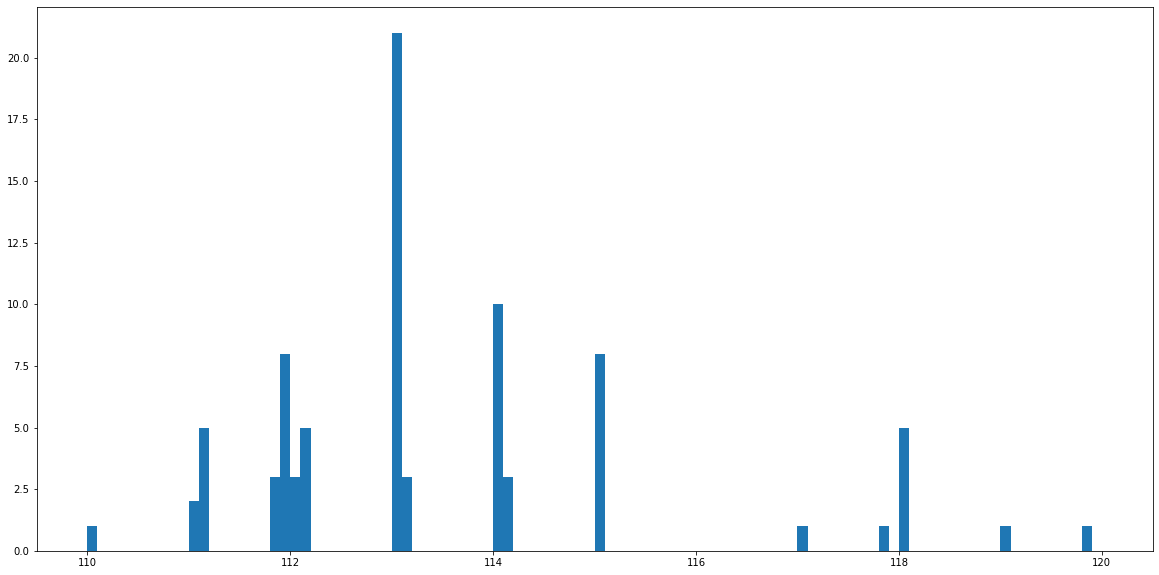

In [19]:
plt.figure(figsize=(20, 10))

plt.hist(modifications_in_pnpdb, bins=100, range=(110, 120))
plt.show()

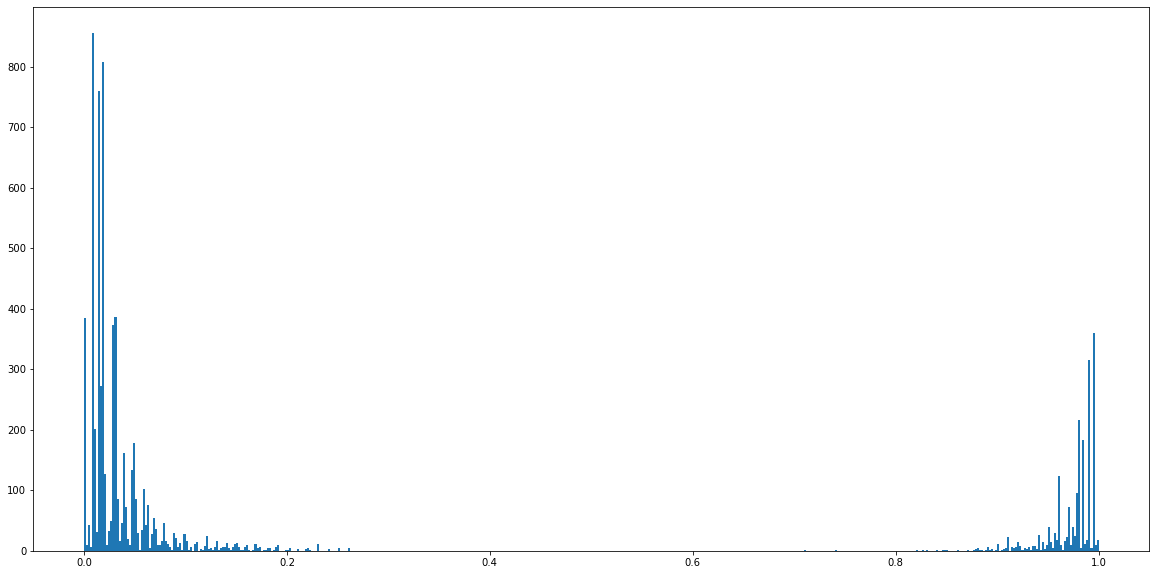

In [70]:
plt.figure(figsize=(20, 10))

plt.hist([mass - np.floor(mass) for mass in modifications_in_pnpdb], bins=500)
plt.show()

In [84]:
most_freq_mods = []

for i in range(0, 300):
    cur = modifications_in_pnpdb[((i - 0.5) < modifications_in_pnpdb) & ((i + 0.5) > modifications_in_pnpdb)]
    if cur.size > 0:
        most_freq_mods.append(cur.mean())

most_freq_mods = np.array(most_freq_mods)

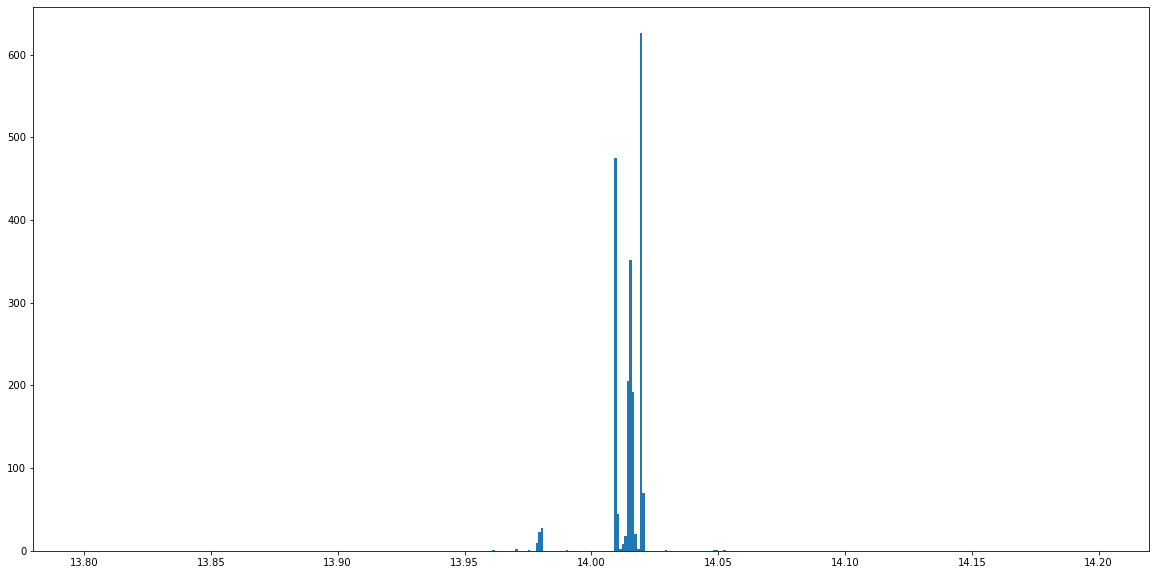

In [117]:
i = 14

plt.figure(figsize=(20, 10))
plt.hist(modifications_in_pnpdb, bins=400, range=(i - 0.2, i + 0.2))
# plt.hist(modifications_in_pnpdb, bins=400, range=(71.02, 71.10))
plt.show()

In [111]:
most_freq_mods

array([3.25789474e-02, 9.90905138e-01, 2.00582622e+00, 2.97500000e+00,
       4.01905000e+00, 4.99516667e+00, 5.98431579e+00, 6.97204762e+00,
       7.99390909e+00, 9.02426316e+00, 1.00137317e+01, 1.09899091e+01,
       1.20137556e+01, 1.30173704e+01, 1.40146105e+01, 1.50053922e+01,
       1.59983364e+01, 1.69959200e+01, 1.79958425e+01, 1.89947273e+01,
       1.99769250e+01, 2.09841111e+01, 2.19662857e+01, 2.30213889e+01,
       2.40216000e+01, 2.50464500e+01, 2.60206269e+01, 2.70235758e+01,
       2.80288655e+01, 2.90076222e+01, 3.00121734e+01, 3.10122000e+01,
       3.19990256e+01, 3.29853571e+01, 3.39781019e+01, 3.49752000e+01,
       3.59841944e+01, 3.69780000e+01, 3.80348889e+01, 3.90086939e+01,
       4.00335641e+01, 4.10316667e+01, 4.20439761e+01, 4.30202456e+01,
       4.40090693e+01, 4.50170000e+01, 4.60101613e+01, 4.69900000e+01,
       4.79979223e+01, 4.90000000e+01, 4.99837451e+01, 5.10033333e+01,
       5.20092308e+01, 5.29977500e+01, 5.40362500e+01, 5.50614167e+01,
      

In [22]:
mod_in_pnpdb_rounded = np.around(modifications_in_pnpdb)
mod_mass_freq = pd.Series(np.ones(300)).add(
    pd.Series(mod_in_pnpdb_rounded).value_counts(), fill_value=0)
mod_mass_freq /= mod_mass_freq.sum()
mod_mass_freq

0      0.002422
1      0.030758
2      0.039840
3      0.000727
4      0.007387
         ...   
295    0.000121
296    0.000242
297    0.000121
298    0.000121
299    0.000121
Length: 300, dtype: float64

In [91]:
mod_mass_freq.to_csv("mod_mass_freq.csv")

In [22]:
matches_data = []

from MolecularFormulaFinder import mffinder
from MolecularFormulaFinder.src import decompose_formula


for scan in tqdm(correct_spectra.index):
    spectrum_file = '../side_sources/gnps_positive_MH_unique/spectra/scan' + str(scan) + '.mgf'
    mass = correct_spectra.loc[scan, 'mass']
    matches_indices = [ind for p_val, ind in matches[scan]]
    matches_inchis = pnps.loc[matches_indices, 'inchi14']
    
    try:
        origin_pnp_ind = matches_inchis[matches_inchis == correct_spectra.loc[scan, 'inchi14']].index[0]
    except IndexError:
        print('Scan', scan, 'has no matches with the original pnp.')
        continue
    if origin_pnp_ind[0] == 0:
        origin_pnp = pnp_graphs[origin_pnp_ind[1]]
    else:
        origin_pnp = new_pnp_graphs[origin_pnp_ind[1]]
    origin_pnp_aa = Counter([origin_pnp.nodes[i]['formula'] for i in origin_pnp.nodes()])
    
    for p_val, ind in matches[scan]:
        # cur_pnp :
        if ind[0] == 0:
            cur_pnp = pnp_graphs[ind[1]]
            mol_file = path_pnpdb + pnps.loc[ind, 'mol_file']
        else:
            cur_pnp = new_pnp_graphs[ind[1]]
            mol_file = path_real_spectra + pnps.loc[ind, 'mol_file']
        cur_pnp_aa = Counter([cur_pnp.nodes[i]['formula'] for i in cur_pnp.nodes()])
        
        # features from varquest:
        res0 = score(spectrum_file, mol_file, scan=scan, blind_search=False)
        res1 = score(spectrum_file, mol_file, scan=scan, blind_search=True)
        res2 = score(spectrum_file, mol_file, scan=scan, blind_search=True, nps=True, p_value=False)
        
        # features about mod_position:
        in_deg = -1
        out_deg = -1
        deg = -1
        if res1['mod_position'] != -1:
            in_deg = cur_pnp.in_degree[res1['mod_position']]
            out_deg = cur_pnp.out_degree[res1['mod_position']]
            deg = cur_pnp.degree[res1['mod_position']]
            assert in_deg + out_deg == deg
        nps_in_deg = -1
        nps_out_deg = -1
        nps_deg = -1
        if res2['mod_position'] != -1:
            nps_in_deg = cur_pnp.in_degree[res2['mod_position']]
            nps_out_deg = cur_pnp.out_degree[res2['mod_position']]
            nps_deg = cur_pnp.degree[res2['mod_position']]
            assert nps_in_deg + nps_out_deg == nps_deg
        
        # correctness:
        corr1 = mod_correctness(ind, origin_pnp_ind, res1['mod_position'])
        corr2 = mod_correctness(ind, origin_pnp_ind, res2['mod_position'])
        
#         # mffinder predictions:
#         if abs(res1['mod_mass_shift']) < 300.0:
#             prediction = mffinder.predict(res1['mod_mass_shift'], k=1)
#             mffinder_replacement = prediction[0][0][1]
#             mffinder_indel = prediction[1]
#         else:
#             mffinder_replacement = None
#             mffinder_indel = None
        
        
        matches_data.append([scan, 
                             correct_spectra.loc[scan, 'parent_mass'], 
                             
                             ind, 
                             pnps.loc[ind, 'mass'], 
                             pnps.loc[ind, 'num_aa'], 
                             pnps.loc[ind, 'formula'], 
                             cur_pnp.graph['structure'], 
                             pnps.loc[ind, 'component'], 
                             
                             res0['score'], 
                             res0['pvalue'], 
                             
                             res1['score'], 
                             res1['pvalue'], 
                             res1['mod_position'], 
                             res1['mod_node'], 
                             res1['mod_mass_shift'], 
                             in_deg, 
                             out_deg, 
                             deg, 
                             
                             res2['score'], 
                             res2['mod_position'], 
                             res2['mod_node'], 
                             res2['mod_mass_shift'], 
                             nps_in_deg, 
                             nps_out_deg, 
                             nps_deg, 
                             
#                              mffinder_replacement, 
#                              mffinder_indel, 
                             
                             int(ind == origin_pnp_ind), 
                             int(pnps.loc[ind, 'component'] == pnps.loc[origin_pnp_ind, 'component']), 
                             corr1, 
                             corr2, 
                            ])

  0%|          | 0/361 [00:00<?, ?it/s]

In [58]:
spectrum_file = '../side_sources/gnps_positive_MH_unique/spectra/scan107.mgf'
mol_file = path_pnpdb + pnps.loc[(0, 3122), 'mol_file']
# mol_file = path_real_spectra + pnps.loc[(1, 7392), 'mol_file']

res2 = score(spectrum_file, mol_file, scan=107, blind_search=True, nps=True, p_value=False)
res2

{'mod_position': 1,
 'mod_node': ('C6H10O2', 114.068),
 'mod_mass_shift': 113.002,
 'score': 22.163,
 'mass_error': 0.0}

In [23]:
%store -r matches_data

In [24]:
len(matches_data)

17956

In [79]:
data = pd.DataFrame(matches_data, columns=['scan', 'parent_mass', 
                                           'ind', 'mass', 'num_aa', 'formula', 'structure', 'component', 
                                           'notblind_score', 'notblind_pvalue', 
                                           'score', 'pvalue', 'mod_position', 'mod_node', 'mod_mass_shift', 
                                           'in_deg', 'out_deg', 'deg', 
                                           'nps_score', 'nps_mod_position', 'nps_mod_node', 'nps_mod_mass_shift', 
                                           'nps_in_deg', 'nps_out_deg', 'nps_deg', 
#                                            'mffinder_replacement', 'mffinder_indel', 
                                           'is_origin_pnp', 'is_cluster_correct', 'correctness', 'nps_correctness', 
                                          ])

In [29]:
%store -r data

Stored 'data' (DataFrame)


In [67]:
from MolecularFormulaFinder import mffinder

replacements = []
indels = []

for i in tqdm(data.index):
    if abs(data.loc[i, 'mod_mass_shift']) < 300.0:
        prediction = mffinder.predict(data.loc[i, 'mod_mass_shift'], k=1)
        replacements.append(prediction[0][0][1])
        indels.append(prediction[1])
    else:
        replacements.append(None)
        indels.append(None)
#         print('data[' + str(i) + ']: Skipped (mod mass shift is too large)')

  0%|          | 0/17956 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [60]:
%store -r replacements

In [61]:
%store -r indels

In [62]:
data['mffinder_replacements'] = replacements
data['mffinder_indels'] = indels

In [27]:
data["mod_mass_freq"] = data["mod_mass_shift"].apply(
    lambda x: mod_mass_freq[np.around(abs(x))] if np.around(abs(x)) in mod_mass_freq.index else 0.0)

In [63]:
data

,scan,parent_mass,ind,mass,num_aa,formula,structure,component,notblind_score,notblind_pvalue,score,pvalue,mod_position,mod_node,mod_mass_shift,in_deg,out_deg,deg,nps_score,nps_mod_position,nps_mod_node,nps_mod_mass_shift,nps_in_deg,nps_out_deg,nps_deg,is_origin_pnp,is_cluster_correct,correctness,nps_correctness,mod_mass_freq,mffinder_replacements,mffinder_indels
0,7,661.386724,"(0, 376)",703.431,5,C40H57N5O6,linear,98,3.0,1.187090e-06,6.0,9.263790e-14,0,"(C12H19O, 179.144)",-42.04420,1,0,1,30.709,0,"(C12H19O, 179.144)",-42.04420,1,0,1,0,1,correctly found replacement,correctly found replacement,0.030516,"(0, 0, 0, 0, 0, 0, 0, 0, -3, -6)",[]
1,7,661.386724,"(0, 3239)",721.441,5,C40H59N5O7,linear,98,3.0,1.100780e-06,6.0,9.263790e-14,0,"(C12H21O2, 197.154)",-60.05470,1,0,1,30.709,0,"(C12H21O2, 197.154)",-60.05470,1,0,1,0,1,correctly found replacement,correctly found replacement,0.004602,"(0, 0, 0, 0, 0, 0, 1, 0, -6, -4)","[(60.0449388199, C2H6NO)]"
2,7,661.386724,"(0, 294)",661.384,5,C37H51N5O6,linear,98,6.0,9.264020e-14,6.0,9.264020e-14,-1,"(None, 0)",0.00000,-1,-1,-1,30.709,-1,"(None, 0)",0.00000,-1,-1,-1,1,1,origin pnp,origin pnp,0.002422,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",[]
3,65,606.402724,"(0, 511)",620.415,4,C33H56N4O7,cyclic,354,5.0,7.012480e-11,7.0,1.036710e-15,0,"(C21H40O2, 324.303)",-14.01220,1,1,2,34.790,0,"(C21H40O2, 324.303)",-14.01220,1,1,2,0,1,correctly found replacement,correctly found replacement,0.252240,"(0, 0, 0, 0, 0, 0, 0, 0, -1, -2)","[(14.0030740052, N)]"
4,65,606.402724,"(0, 1300)",494.274,4,C24H38N4O7,cyclic,354,4.0,3.672410e-08,7.0,1.036710e-15,0,"(C12H22O2, 198.162)",112.12900,1,1,2,34.790,0,"(C12H22O2, 198.162)",112.12900,1,1,2,0,1,correctly found replacement,correctly found replacement,0.002422,"(0, 0, 0, 0, 0, 0, 0, 0, 8, 16)",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17951,11836,1036.482724,"(0, 992)",1038.510,8,C54H70N8O13,branch-cyclic,371,7.0,1.311170e-13,12.0,2.340580e-25,4,"(C10H11NO2, 177.079)",-2.02351,1,1,2,50.126,4,"(C10H11NO2, 177.079)",-2.02351,1,1,2,0,1,correctly found replacement,correctly found replacement,0.039840,"(0, 0, 0, 0, 0, 0, 0, 0, 0, -2)",[]
17952,11836,1036.482724,"(0, 2302)",1036.490,8,C54H68N8O13,branch-cyclic,371,11.0,6.615030e-23,11.0,6.615030e-23,-1,"(None, 0)",0.00000,-1,-1,-1,48.926,-1,"(None, 0)",0.00000,-1,-1,-1,0,1,AA shuffle or iso-AA,AA shuffle or iso-AA,0.002422,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",[]
17953,11836,1036.482724,"(1, 11836)",1036.491,8,C54H68N8O13,branch-cyclic,371,11.0,6.615030e-23,11.0,6.615030e-23,-1,"(None, 0)",0.00000,-1,-1,-1,48.926,-1,"(None, 0)",0.00000,-1,-1,-1,1,1,origin pnp,origin pnp,0.002422,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",[]
17954,11836,1036.482724,"(0, 1788)",1198.550,8,C54H78N12O19,cyclic,400,5.0,4.049100e-09,9.0,3.296130e-17,3,"(C9H9NO3, 179.058)",-162.06800,1,1,2,19.079,3,"(C9H9NO3, 179.058)",-162.06800,1,1,2,0,0,incorrect (6 -> 6),incorrect (6 -> 6),0.006902,"(0, 0, 0, 0, 0, 0, -5, 0, -6, -10)","[(162.0555035062, C9H8NO2), (162.0793129535, C..."


In [30]:
data["mod_mass_freq"].value_counts()

0.000000    2408
0.000363    1106
0.002422    1087
0.000242    1057
0.000121    1029
            ... 
0.005086      55
0.002180      51
0.003633      43
0.003512      33
0.006902      24
Name: mod_mass_freq, Length: 62, dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17956 entries, 0 to 17955
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   scan                17956 non-null  int64  
 1   parent_mass         17956 non-null  float64
 2   ind                 17956 non-null  object 
 3   mass                17956 non-null  float64
 4   num_aa              17956 non-null  int64  
 5   formula             17956 non-null  object 
 6   structure           17956 non-null  object 
 7   component           17956 non-null  int64  
 8   notblind_score      17956 non-null  float64
 9   notblind_pvalue     17956 non-null  float64
 10  score               17956 non-null  float64
 11  pvalue              17956 non-null  float64
 12  mod_position        17956 non-null  int64  
 13  mod_node            17956 non-null  object 
 14  mod_mass_shift      17956 non-null  float64
 15  in_deg              17956 non-null  int64  
 16  out_

In [32]:
data.to_csv("data.csv", index=False)

In [72]:
data.loc[0]

scan                                                            7
parent_mass                                            661.386724
ind                                                      (0, 376)
mass                                                      703.431
num_aa                                                          5
formula                                                C40H57N5O6
structure                                                  linear
component                                                      98
notbilnd_score                                                3.0
notblind_pvalue                                          0.000001
score                                                         6.0
pvalue                                                        0.0
mod_position                                                    0
mod_node                                       (C12H19O, 179.144)
mod_mass_shift                                           -42.0442
in_deg    

In [73]:
data[data['mod_mass_shift'] != data['nps_mod_mass_shift']]

,scan,parent_mass,ind,mass,num_aa,formula,structure,component,notbilnd_score,notblind_pvalue,...,nps_mod_node,nps_mod_mass_shift,nps_in_deg,nps_out_deg,nps_deg,is_origin_pnp,is_cluster_correct,correctness,mffinder_replacements,mffinder_indels
4222,2762,1558.872724,"(0, 4540)",1655.930,17,C81H125N17O20,linear,128,13.0,1.783920e-25,...,"(C5H7NO, 97.0528)",-97.0528,1,1,2,0,1,incorrectly found deletion,"(0, 0, 0, 0, 0, 0, -1, -1, -5, -7)","[(97.040187793, C4H5N2O), (97.052763852, C5H7N..."
6350,4302,600.385724,"(0, 3677)",657.410,6,C35H55N5O7,cyclic,8,3.0,2.758020e-05,...,"(C2H3NO, 57.0215)",-57.0215,1,1,2,0,1,incorrect (3 : 2),"(0, 0, 0, 0, 0, 0, -1, -1, -2, -3)","[(57.02146372359999, C2H3NO), (57.0340397826, ..."
8710,5700,638.350724,"(0, 708)",752.419,6,C36H64O16,linear,320,5.0,2.940410e-11,...,"(C6H10O2, 114.068)",-114.0680,1,1,2,0,1,incorrectly found deletion,"(0, 0, 0, 0, 0, 0, -2, 0, -6, -10)","[(114.0555035062, C5H8NO2), (114.0680795652, C..."
10318,6705,1006.662724,"(0, 1757)",1077.720,11,C53H95N11O12,cyclic,65,5.0,2.817530e-08,...,"(C3H5NO, 71.0371)",-71.0371,1,1,2,0,0,incorrect (7 : 4),"(0, 0, 0, 0, 0, 0, -1, -1, -3, -5)","[(71.0371137878, C3H5NO), (71.04968984679999, ..."
10523,6806,1153.702724,"(1, 6006)",1252.789,11,C61H108N10O17,branch-cyclic,210,13.0,3.252560e-24,...,"(C5H9NO, 99.0684)",-99.0684,1,1,2,0,0,incorrect (7 : 6),"(0, 0, 0, 0, 0, 0, 0, -1, -6, -13)","[(99.0684139162, C5H9NO), (99.0809899752, C6H1..."
15396,10472,586.371724,"(0, 2856)",643.394,6,C34H53N5O7,cyclic,8,4.0,1.194050e-07,...,"(C2H3NO, 57.0215)",-57.0215,1,1,2,0,1,incorrect (3 : 2),"(0, 0, 0, 0, 0, 0, -1, -1, -2, -3)","[(57.02146372359999, C2H3NO), (57.0340397826, ..."
15824,10832,873.493724,"(0, 3027)",986.584,9,C53H78N8O10,branch-cyclic,474,9.0,1.336840e-13,...,"(C6H11NO, 113.084)",-113.0840,1,1,2,0,0,incorrect (6 : 5),"(0, 0, 0, 0, 0, 0, 0, -3, -5, -11)","[(113.0714879214, C5H9N2O), (113.0840639804, C..."
17259,11239,1153.712724,"(1, 6006)",1252.789,11,C61H108N10O17,branch-cyclic,210,13.0,1.552110e-24,...,"(C5H9NO, 99.0684)",-99.0684,1,1,2,0,1,incorrect (3 : 2),"(0, 0, 0, 0, 0, 0, 0, -3, -4, -9)","[(99.0684139162, C5H9NO), (99.0809899752, C6H1..."
17648,11487,524.282724,"(1, 5700)",638.351,5,C30H54O14,linear,320,5.0,1.503470e-12,...,"(C6H10O2, 114.068)",-114.0680,1,1,2,0,1,incorrectly found deletion,"(0, 0, 0, 0, 0, 0, -2, 0, -6, -10)","[(114.0555035062, C5H8NO2), (114.0680795652, C..."


In [74]:
data.loc[4222]

scan                                                                  2762
parent_mass                                                    1558.872724
ind                                                              (0, 4540)
mass                                                               1655.93
num_aa                                                                  17
formula                                                      C81H125N17O20
structure                                                           linear
component                                                              128
notbilnd_score                                                        13.0
notblind_pvalue                                                        0.0
score                                                                  9.0
pvalue                                                                 0.0
mod_position                                                             1
mod_node                 

In [75]:
spectrum_file = '../side_sources/gnps_positive_MH_unique/spectra/scan2762.mgf'
mol_file = path_pnpdb + pnps.loc[(0, 4540), 'mol_file']
# mol_file = path_real_spectra + pnps.loc[(1, 7392), 'mol_file']

res2 = score(spectrum_file, mol_file, scan=2762, blind_search=True, nps=True, p_value=False)
res2

{'mod_position': 2,
 'mod_node': ('C5H7NO', 97.0528),
 'mod_mass_shift': -97.0528,
 'score': 36.39,
 'mass_error': -0.00319569}

In [26]:
correct_spectra.index[0:10]

Int64Index([7, 65, 77, 97, 107, 184, 185, 266, 267, 324], dtype='int64')

- scan   7: точно найденные замены
- scan  65: точно найденные замены
- scan  77: точно найденные замены
- scan  97: найдены pnp, отличающиеся одной заменой, но замены определены неточно (как правило на соседние аминокислоты)
- scan 107: точно найденные замены
- scan 184: найден pnp, отличающийся заменой, но модификация отмечена на соседней аминокислоте; неправильный топ-2 со странным предложением удаления, правильные матчи ниже топ3
- scan 185: много с равным p_value в топе; в топ-1 найден pnp, отличающийся заменой, но модификация отмечена на соседней аминокислоте;
- scan 266: есть правильные замены в районе топ-25, много неправильных в топе (но, видимо, трудноотличимые)
- scan 267: точно найденные замены
- scan 324: найдена одна точная замена, но далеко не в топе; в топе неправильные но трудно отличимые

In [79]:
keys = ['scan', 'parent_mass', 'mffinder_replacements', 'mffinder_indels', 'notblind_pvalue', 'notbilnd_score']
pd.set_option('display.max_columns', None)  # or 1000
data[(data.scan == 324)].head(20)

,scan,parent_mass,ind,mass,num_aa,formula,structure,component,notbilnd_score,notblind_pvalue,score,pvalue,mod_position,mod_node,mod_mass_shift,in_deg,out_deg,deg,nps_score,nps_mod_position,nps_mod_node,nps_mod_mass_shift,nps_in_deg,nps_out_deg,nps_deg,is_origin_pnp,is_cluster_correct,correctness,nps_correctness
226,324,1306.832724,"(0, 393)",1280.820,11,C63H112N10O17,branch-cyclic,210,8.0,2.432360e-12,18.0,1.101760e-32,0,"(C14H27O2, 227.201)",26.01200,1,0,1,89.699,0,"(C14H27O2, 227.201)",26.01200,1,0,1,0,0,incorrect (2 -> 2),incorrect (2 -> 2)
227,324,1306.832724,"(1, 6006)",1252.789,11,C61H108N10O17,branch-cyclic,210,8.0,2.895650e-12,18.0,1.101760e-32,0,"(C12H23O2, 199.17)",54.04330,1,0,1,89.699,0,"(C12H23O2, 199.17)",54.04330,1,0,1,0,0,incorrect (2 -> 2),incorrect (2 -> 2)
228,324,1306.832724,"(1, 7617)",1308.852,11,C65H116N10O17,branch-cyclic,210,7.0,1.275160e-10,18.0,1.101760e-32,0,"(C16H31O2, 255.232)",-2.01927,1,0,1,89.699,0,"(C16H31O2, 255.232)",-2.01927,1,0,1,0,0,incorrect (2 -> 2),incorrect (2 -> 2)
229,324,1306.832724,"(0, 391)",1111.670,10,C53H93N9O16,branch-cyclic,210,7.0,6.735380e-11,14.0,1.078870e-25,5,"(C5H9NO, 99.0684)",195.15900,1,1,2,58.490,0,"(C10H19O2, 171.139)",195.15900,1,0,1,0,0,incorrect (2 -> 3),incorrect (2 -> 3)
230,324,1306.832724,"(0, 429)",1125.690,10,C54H95N9O16,branch-cyclic,210,6.0,3.707990e-09,14.0,1.078870e-25,4,"(C6H11NO, 113.084)",181.14300,1,1,2,54.474,4,"(C6H11NO, 113.084)",181.14300,1,1,2,0,0,incorrect (1 -> 2),incorrect (1 -> 2)
231,324,1306.832724,"(0, 355)",1266.810,11,C62H110N10O17,branch-cyclic,210,6.0,8.350520e-09,14.0,3.777690e-24,0,"(C12H23O2, 199.17)",40.02770,1,0,1,58.466,7,"(C4H6NO2, 100.04)",40.02770,1,2,3,0,0,incorrect (2 -> 2),incorrect (2 -> 2)
232,324,1306.832724,"(0, 1622)",1294.840,11,C64H114N10O17,branch-cyclic,210,7.0,1.373250e-10,14.0,3.777690e-24,0,"(C14H27O2, 227.201)",11.99640,1,0,1,58.466,7,"(C4H6NO2, 100.04)",11.99640,1,2,3,0,0,incorrect (2 -> 2),incorrect (2 -> 2)
233,324,1306.832724,"(0, 3290)",1298.830,10,C63H114N10O18,linear,-1,6.0,4.683600e-12,11.0,5.782390e-24,0,"(C20H38NO3, 340.285)",8.00146,1,0,1,59.223,0,"(C20H38NO3, 340.285)",8.00146,1,0,1,0,0,incorrect (3 -> 4),incorrect (3 -> 4)
234,324,1306.832724,"(0, 4191)",1111.670,10,C53H93N9O16,branch-cyclic,210,6.0,3.992320e-09,13.0,1.581820e-23,9,"(C10H19O2, 171.139)",195.15900,1,0,1,61.942,9,"(C10H19O2, 171.139)",195.15900,1,0,1,0,0,incorrect (2 -> 3),incorrect (2 -> 3)
235,324,1306.832724,"(0, 640)",1408.840,12,C67H116N12O20,branch-cyclic,210,7.0,3.725520e-10,14.0,9.110180e-23,1,"(C6H11NO, 113.084)",-102.01000,1,1,2,35.456,1,"(C6H11NO, 113.084)",-102.01000,1,1,2,0,0,incorrect (5 -> 4),incorrect (5 -> 4)


In [74]:
data.groupby('correctness').count()

,scan,parent_mass,ind,mass,num_aa,formula,structure,component,notbilnd_score,notblind_pvalue,...,nps_mod_position,nps_mod_node,nps_mod_mass_shift,nps_in_deg,nps_out_deg,nps_deg,is_origin_pnp,is_cluster_correct,mffinder_replacements,mffinder_indels
correctness,,,,,,,,,,,,,,,,,,,,,
AA shuffle or iso-AA,101,101,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,101
incorrect (1 : 2),198,198,198,198,198,198,198,198,198,198,...,198,198,198,198,198,198,198,198,198,198
incorrect (1 : 3),181,181,181,181,181,181,181,181,181,181,...,181,181,181,181,181,181,181,181,150,150
incorrect (1 : 4),116,116,116,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,36,36
incorrect (1 : 5),106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
origin pnp,361,361,361,361,361,361,361,361,361,361,...,361,361,361,361,361,361,361,361,361,361
presumably a correctly found deletion,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
presumably a correctly found insertion,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,58,58


{'multiedges': False, 'structure': 'branch-cyclic'}
{'multiedges': False, 'structure': 'branch-cyclic'}


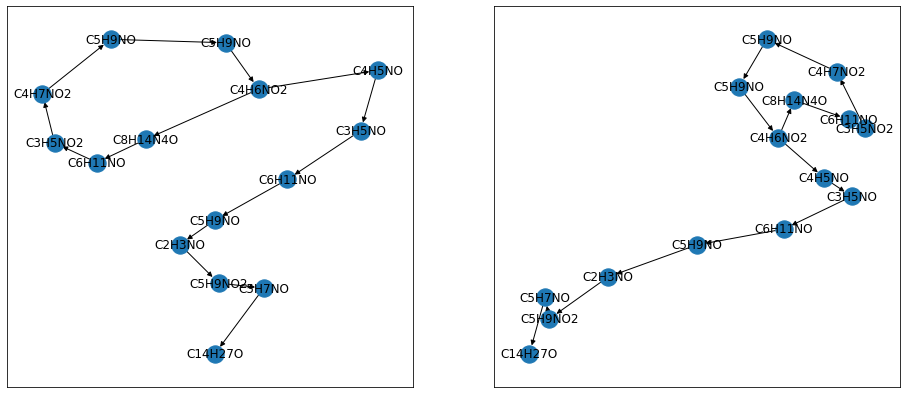

In [51]:
# TEMPORARY

pnp1 = new_pnp_graphs[3172]
pnp2 = pnp_graphs[2425]

print(pnp1.graph)
print(pnp2.graph)
fig = plt.figure(figsize = (16, 7))
l1 = {}
l2 = {}
for i in range(pnp1.number_of_nodes()):
    l1[i] = pnp1.nodes[i]['formula']
for i in range(pnp2.number_of_nodes()):
    l2[i] = pnp2.nodes[i]['formula']
subax1 = plt.subplot(121)
nx.draw_networkx(pnp1, labels=l1)
subax2 = plt.subplot(122)
nx.draw_networkx(pnp2, labels=l2)
plt.show()

In [95]:
pnps.loc[[(0, 1062), (1, 185)]]

,,mol_file,name,mass,num_aa,smile,formula,inchikey,inchi14,component,parent_mass
0,1062,mols/GYO29-E.mol,"Cyclosporin,_9CI_9-(N-Methyl-L-isoleucine)_ana...",1201.840,11,CC=CCC(C)C(C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(C...,C62H111N11O12,RPJPZDVUUKWPGT-UHFFFAOYSA-N,RPJPZDVUUKWPGT,65,1202.85
1,185,mol_dir/PMATZTZNYRCHOR.mol,Cyclosporin A,1201.841,11,CCC1NC(=O)C(C(O)C(C)C\C=C\C)N(C)C(=O)C(C(C)C)N...,C62H111N11O12,PMATZTZNYRCHOR-IMVLJIQESA-N,PMATZTZNYRCHOR,65,1202.85


### Посмотрим на результаты

In [33]:
def show_matches(scan, print_scan_info=False):
    if print_scan_info:
        print(correct_spectra.loc[scan, ['name', 'mass', 'formula', 'inchikey', 'inchi14']])
        print(matches[scan])

    indices = []
    for _, ind in matches[scan]:
        indices.append(ind)

    return pnps.loc[indices, ['name', 'mass', 'num_aa', 'formula', 'inchi14', 'component']]

In [19]:
i = -1

In [20]:
i += 1

In [26]:
show_matches(correct_spectra.index[i], print_scan_info=True)

name        dragomabin_18169_dereplictor_pv_5.82725e-12
mass                                            661.384
formula                                      C37H51N5O6
inchikey                    JAYHQHZOWYDLDQ-PONGSQKHSA-N
inchi14                                  JAYHQHZOWYDLDQ
Name: 7, dtype: object


name     mass  num_aa     formula  \
0 376                    Carmabin_A_Carmabin_A  703.431     5.0  C40H57N5O6   
  3239  Carmabin_A_9,9,10,10-Tetrahydro,_9-oxo  721.441     5.0  C40H59N5O7   
  294                    Dragomabin_Dragomabin  661.384     5.0  C37H51N5O6   

               inchi14  component  
0 376   BRWIYXLUWTZWGU        310  
  3239  FZTCTTODSSJQQB        310  
  294   JAYHQHZOWYDLDQ        310

In [15]:
no_top_1 = []
no_top_5 = []
no_top_10 = []

for scan in correct_spectra.index:
    scan_inchi14 = correct_spectra.loc[scan, 'inchi14']
    df = show_matches(scan)
    try:
        ind = df[df.inchi14 == scan_inchi14].index[0]
    except:
        print(scan, ': no matches')
        continue
    scan_component = df.loc[ind, 'component']
    if scan_component == -1:
        print(scan, 'isolated')
        continue
    
    flag_1 = False
    flag_5 = False
    flag_10 = False
    for i in range(min(10, df.shape[0])):
        if df.iloc[i]['component'] == scan_component and df.iloc[i]['inchi14'] != scan_inchi14:
            if i < 1:
                flag_1 = True
            if i < 5:
                flag_5 = True
            flag_10 = True
    
    if not flag_1:
        no_top_1.append(scan)
    if not flag_5:
        no_top_5.append(scan)
    if not flag_10:
        no_top_10.append(scan)


701 isolated
2413 isolated
2419 isolated
2483 isolated
2546 isolated
3076 isolated
3190 isolated
3811 isolated
3909 isolated
3932 isolated
3987 isolated
4742 isolated
5141 isolated
5198 isolated
5249 isolated
5280 isolated
5933 isolated
6538 isolated
7216 isolated
8379 isolated
9344 isolated
9712 isolated
10495 isolated
10508 isolated
10773 isolated
11546 isolated


In [16]:
no_top_1

[77,
 324,
 326,
 357,
 561,
 615,
 651,
 771,
 783,
 820,
 823,
 862,
 971,
 1058,
 1139,
 1163,
 1329,
 1467,
 1696,
 1702,
 1818,
 2011,
 2125,
 2181,
 2477,
 2643,
 2693,
 2762,
 2792,
 2825,
 3060,
 3217,
 3297,
 3558,
 3562,
 3669,
 3692,
 3742,
 3784,
 3911,
 4417,
 4513,
 4529,
 4991,
 5199,
 5305,
 5307,
 5321,
 5354,
 5522,
 5611,
 5700,
 5738,
 5763,
 6181,
 6315,
 6438,
 6653,
 6662,
 6671,
 6674,
 6712,
 6723,
 6754,
 6806,
 7013,
 7042,
 7145,
 7182,
 7307,
 7319,
 7375,
 7445,
 7535,
 7698,
 7752,
 7768,
 7927,
 7960,
 7994,
 8075,
 8254,
 8691,
 8739,
 9282,
 9307,
 9330,
 9465,
 9752,
 9852,
 10029,
 10062,
 10206,
 10376,
 10406,
 10420,
 10472,
 10513,
 10525,
 10614,
 10814,
 10835,
 10886,
 10931,
 11041,
 11101,
 11130,
 11158,
 11351,
 11377,
 11487]

In [17]:
len(no_top_1)

111

In [18]:
no_top_5

[324,
 820,
 1163,
 1467,
 2477,
 2643,
 3060,
 4513,
 5305,
 5522,
 6438,
 6806,
 7013,
 7535,
 9752,
 9852,
 10376]

In [19]:
no_top_10

[324, 820, 1163, 3060, 5305, 5522, 6438, 6806, 7013, 9752, 9852]

In [34]:
show_matches(scan=11215, print_scan_info=True).head(30)

name        Cyclosporin-P;_6-((2S_3R_4R_6E)-2-Amino-_26885...
mass                                                 1203.821
formula                                         C61H109N11O13
inchikey                          TZCUXJXFGWPMBF-BSFFRLPKSA-N
inchi14                                        TZCUXJXFGWPMBF
Name: 11215, dtype: object
[(2.26141e-37, (0, 80)), (4.26448e-35, (0, 1062)), (4.26448e-35, (1, 185)), (7.51047e-33, (0, 756)), (7.51047e-33, (0, 2080)), (7.51047e-33, (0, 2621)), (7.51047e-33, (0, 2723)), (1.23227e-30, (0, 1026)), (1.23227e-30, (0, 1135)), (1.8783e-28, (0, 674)), (1.8783e-28, (0, 698)), (1.8783e-28, (0, 1881)), (1.8783e-28, (0, 1882)), (1.8783e-28, (0, 1913)), (1.8783e-28, (0, 1984)), (1.8783e-28, (0, 2049)), (1.8783e-28, (0, 2164)), (1.8783e-28, (0, 2275)), (1.8783e-28, (0, 2554)), (1.8783e-28, (0, 4522)), (1.8783e-28, (0, 4528)), (2.65129e-26, (0, 1947)), (2.65129e-26, (0, 1948)), (2.65129e-26, (0, 1985)), (2.65129e-26, (0, 2380)), (2.65129e-26, (0, 4527)), (3.4

name      mass  num_aa  \
0 80    Cyclosporin,_9CI_4-[2-(Methylamino)pentanoic_a...  1187.830      11   
  1062  Cyclosporin,_9CI_9-(N-Methyl-L-isoleucine)_ana...  1201.840      11   
1 185                                       Cyclosporin A  1201.841      11   
0 756   (D-Hiv)2(Leu)4(Thr)7-Cyclosporin_A_(D-Hiv)2(Le...  1232.840      11   
  2080                     Cyclosporin,_9CI_Cyclosporin_E  1187.830      11   
  2621                     Cyclosporin,_9CI_Cyclosporin_U  1187.830      11   
  2723                     Cyclosporin,_9CI_Cyclosporin_X  1201.840      11   
  1026  Cyclosporin,_9CI_4-L-Leucine,_10-L-alanine_ana...  1175.790      11   
  1135                     Cyclosporin,_9CI_Cyclosporin_Z  1173.850      11   
  674   (D-Hiv)2(Leu)4(Thr)7-Cyclosporin_A_8-Glycine,_...  1232.840      11   
  698   (D-Hiv)2(Leu)4(Thr)7-Cyclosporin_A_9,10-Di-L-l...  1232.840      11   
  1881                     Cyclosporin,_9CI_Cyclosporin_J  1145.820      11   
  1882                             Cyclosporin,_9CI_Deoxy  1185.850      11   
  1913                          Cyclosporin,_9CI_N9-De-Me  1187.830      11   
  1984                     Cyclosporin,_9CI_Cyclosporin_C  1217.840      11   
  2049                          Cyclosporin,_9CI_N*-De-Me  1201.840      11   
  2164          Antibiotic_FR_901459_Antibiotic_FR_901459  1217.840      11   
  2275                     Cyclosporin,_9CI_Cyclosporin_L  1187.830      11   
  2554                     Cyclosporin,_9CI_Cyclosporin_S  1189.800      11   
  4522                    [8'-Hydroxy-MeBmf]1-cyclosporin  1217.840      11   
  4528                       g-Hydroxy-Meleu4-cyclosporin  1217.840      11   
  1947                     Cyclosporin,_9CI_Cyclosporin_B  1187.830      11   
  1948                  Isocyclosporin_D_Isocyclosporin_D  1215.860      11   
  1985   Cyclosporin,_9CI_2-[O-(2-Hydroxyethyl)-D-serine]  1261.860      11   
  2380                     Cyclosporin,_9CI_Cyclosporin_O  1159.830      11   
  4527                               Allylgly-cyclosporin  1213.840      11   
  37    Cyclosporin,_9CI_10-(2-Aminobutanoic_acid)_ana...  1187.830      11   
  40                   Cyclosporin,_9CI_7''-Hydroperoxide  1247.850      11   
  757   (D-Hiv)2(Leu)4(Thr)7-Cyclosporin_A_10-L-Leucin...  1246.850      11   
  999           Cyclosporin,_9CI_10-L-Isoleucine_analogue  1231.850      11   

              formula         inchi14  component  
0 80    C61H109N11O12  WKXVYCGLVFPFIG         65  
  1062  C62H111N11O12  RPJPZDVUUKWPGT         65  
1 185   C62H111N11O12  PMATZTZNYRCHOR         65  
0 756   C63H112N10O14  KJMXSLXEMQTIKU         65  
  2080  C61H109N11O12  SYXYUKMELXLDBD         65  
  2621  C61H109N11O12  FWMBRFVXLUJFCT         65  
  2723  C62H111N11O12  SPRAXCMVHXBDMZ         65  
  1026  C59H105N11O13  SCEHVYUPKRXSNW         65  
  1135  C61H111N11O11  FAOPPOYNVNUOHA         65  
  674   C63H112N10O14  FMSSOGHQGVPAJN         65  
  698   C63H112N10O14  UESXSGRRVNMFRO         65  
  1881  C59H107N11O11  JFJHGNWTEKJXNK         65  
  1882  C62H111N11O11  GNGBSKIQPUCELM         65  
  1913  C61H109N11O12  MIIRLHRXLLVIMF         65  
  1984  C62H111N11O13  JTOKYIBTLUQVQV         65  
  2049  C62H111N11O12  UYPPEWHLQQUDPM         65  
  2164  C62H111N11O13  RXQFIJPCAOCJDB         65  
  2275  C61H109N11O12  ZSNYYEIGOZADKA         65  
  2554  C60H107N11O13  IMJWIFHWHLWFDD         65  
  4522  C62H111N11O13  ZPZHKIOMBYYVRD         65  
  4528  C62H111N11O13  DFZMWWCBMPCKFD         65  
  1947  C61H109N11O12  UCOQITKXMNKTKF         65  
  1948  C63H113N11O12  CLOAPNHOUOVLON         65  
  1985  C64H115N11O14  LJRQVYVZMJMPAM         65  
  2380  C60H109N11O11  NLGBWFHSHJPDQX         65  
  4527  C63H111N11O12  CMAFQIOYYXZBBZ         65  
  37    C61H109N11O12  IPDSMZFDGQKXHO         65  
  40    C63H113N11O14  KYBATFIKDXSTTP         65  
  757   C64H114N10O14  LIHJQIQNBOBQOY         65  
  999   C63H113N11O13  IZUOWPDPGMBNCB         65

In [117]:
pnps[pnps.component == 167][['mol_file', 'name', 'mass', 'num_aa', 'formula', 'inchi14', 'component']]

mol_file  \
0 2238               mols/CYN68-S.mol   
  2310               mols/CYN70-N.mol   
  2339               mols/CYN71-O.mol   
  2377               mols/CYN72-P.mol   
  2416               mols/CYN73-Q.mol   
  4116   mols/antimarin2012_40288.mol   
  4122   mols/antimarin2012_38427.mol   
  4125   mols/antimarin2012_40289.mol   
  4127   mols/antimarin2012_40295.mol   
  4128   mols/antimarin2012_40294.mol   
  4131   mols/antimarin2012_37779.mol   
  4133   mols/antimarin2012_40291.mol   
  4134   mols/antimarin2012_38490.mol   
  4135   mols/antimarin2012_42534.mol   
  4138   mols/antimarin2012_37477.mol   
  4141   mols/antimarin2012_40296.mol   
  4237   mols/antimarin2012_46852.mol   
  4322   mols/antimarin2012_46853.mol   
  4343   mols/antimarin2012_54293.mol   
  4370   mols/antimarin2012_38729.mol   
  4372   mols/antimarin2012_38736.mol   
  4373   mols/antimarin2012_38727.mol   
  4375   mols/antimarin2012_38730.mol   
  4377   mols/antimarin2012_38731.mol   
  4378   mols/antimarin2012_38732.mol   
  4379   mols/antimarin2012_41641.mol   
  4381   mols/antimarin2012_38728.mol   
  4382   mols/antimarin2012_38733.mol   
  4383   mols/antimarin2012_54297.mol   
  4384   mols/antimarin2012_54296.mol   
  4385   mols/antimarin2012_54295.mol   
  4387   mols/antimarin2012_53553.mol   
  4388   mols/antimarin2012_54298.mol   
  4389   mols/antimarin2012_54294.mol   
  4392   mols/antimarin2012_38737.mol   
  4395   mols/antimarin2012_53552.mol   
  4397   mols/antimarin2012_53551.mol   
  4401   mols/antimarin2012_38734.mol   
  4407   mols/antimarin2012_38735.mol   
  4706   mols/antimarin2012_55183.mol   
1 651      mol_dir/BMBMPDCQHGVNGA.mol   
  6438     mol_dir/SBAIVQLISRIJKN.mol   
  9187     mol_dir/IICJGRPHDDKCDK.mol   
  10319    mol_dir/GNPWSZMDKPTDLE.mol   
  11351    mol_dir/FWNVJYNXEWXTEC.mol   
  11577    mol_dir/FWSKKZMBNIVBFL.mol   

                                                     name      mass  num_aa  \
0 2238                       Hypomurocin_A_Hypomurocin_A1  1160.750    12.0   
  2310                       Hypomurocin_A_Hypomurocin_A2  1174.770    12.0   
  2339                       Hypomurocin_A_Hypomurocin_A3  1174.770    12.0   
  2377                       Hypomurocin_A_Hypomurocin_A4  1174.770    12.0   
  2416                       Hypomurocin_A_Hypomurocin_A5  1188.780    12.0   
  4116                                     Trichorovin-Ib  1146.740    12.0   
  4122                                     Trichorovin-Ia  1146.740    12.0   
  4125                                    Trichorovin-IIb  1146.740    12.0   
  4127                                   Trichorovin-VIIb  1160.750    12.0   
  4128                                    Trichorovin-VIb  1160.750    12.0   
  4131                                    Trichorovin-VIa  1160.750    12.0   
  4133                                    Trichorovin-IVb  1160.750    12.0   
  4134                                   Trichorovin-VIIa  1160.750    12.0   
  4135                                     Harzianin_HB_I  1160.750    12.0   
  4138                                     Trichorovin-XI  1174.770    12.0   
  4141                                    Trichorovin-IXb  1174.770    12.0   
  4237                                 Pseudokonin_KL_III  1074.680    11.0   
  4322                                  Pseudokonin_KL_VI  1045.650    10.0   
  4343                                  Trichobrachin_A_I  1146.740    12.0   
  4370                   Harzianin_HC-6;_Trichovirin_I_4a  1385.860    15.0   
  4372                                    Harzianin_HC-14  1399.880    15.0   
  4373                  Harzianin_HC-1b;_Trichovirin_I-1b  1401.860    15.0   
  4375                   Harzianin_HC-8;_Trichovirin_I-5B  1399.880    15.0   
  4377                                     Harzianin_HC-9  1413.900    15.0   
  4378                    Harzianin_HC-10;_Harzianin-HC-X  1413.900    15.0   
  4379                                    Harzi

In [47]:
data.loc[data["scan"] == 5413, ["ind", "mass", "num_aa", "formula", "score", "pvalue", "mod_node", 
                                 "mod_mass_shift", "mod_mass_freq", "correctness"]].head(50)

,ind,mass,num_aa,formula,score,pvalue,mod_node,mod_mass_shift,mod_mass_freq,correctness
7979,"(0, 299)",681.456,6,C36H63N3O9,7.0,2.049460e-15,"(C7H13NO, 127.1)",227.1500,0.000484,correctly found insertion
7980,"(0, 1008)",667.441,6,C35H61N3O9,7.0,2.049460e-15,"(C6H11NO, 113.084)",241.1660,0.000605,incorrect (1 -> 3)
7981,"(0, 1575)",641.400,6,C31H55N5O9,7.0,2.049460e-15,"(C5H9NO, 99.0684)",267.2070,0.000242,incorrect (5 -> 7)
7982,"(0, 2669)",655.416,6,C32H57N5O9,7.0,2.049460e-15,"(C6H11NO, 113.084)",253.1910,0.000242,incorrect (5 -> 7)
7983,"(0, 2706)",653.425,6,C34H59N3O9,7.0,2.049460e-15,"(C5H9NO, 99.0684)",255.1820,0.000242,incorrect (3 -> 5)
7984,"(0, 2914)",667.441,6,C35H61N3O9,7.0,2.049460e-15,"(C6H11NO, 113.084)",241.1660,0.000605,incorrect (3 -> 5)
7985,"(0, 2940)",667.441,6,C35H61N3O9,7.0,2.049460e-15,"(C6H11NO, 113.084)",241.1660,0.000605,incorrect (3 -> 5)
7986,"(1, 4739)",667.441,6,C35H61N3O9,7.0,2.049460e-15,"(C6H11NO, 113.084)",241.1660,0.000605,incorrect (3 -> 5)
7987,"(1, 11137)",667.441,6,C35H61N3O9,7.0,2.049460e-15,"(C6H11NO, 113.084)",241.1660,0.000605,incorrect (1 -> 3)
7988,"(0, 2235)",967.621,9,C48H85N7O13,8.0,6.664120e-15,"(C4H7NO, 85.0528)",-59.0138,0.000848,incorrect (5 -> 4)


{'multiedges': False, 'structure': 'cyclic'}
{'multiedges': False, 'structure': 'cyclic'}


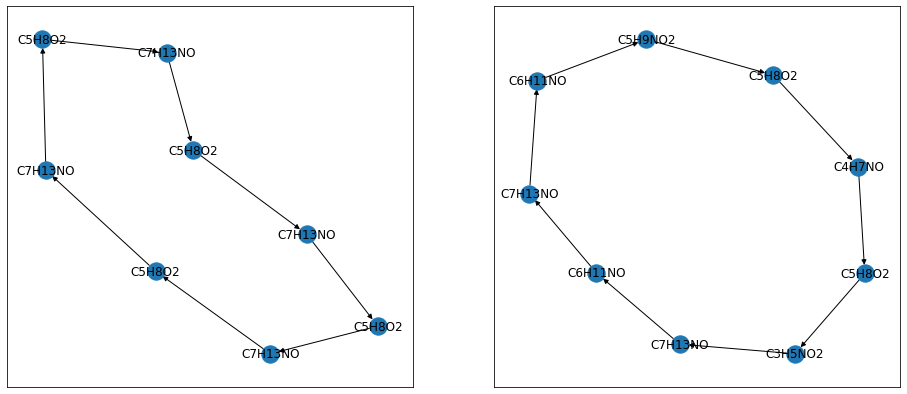

In [51]:
# TEMPORARY

pnp1 = pnp_graphs[2265]
pnp2 = pnp_graphs[2235]

print(pnp1.graph)
print(pnp2.graph)
fig = plt.figure(figsize = (16, 7))
l1 = {}
l2 = {}
for i in range(pnp1.number_of_nodes()):
    l1[i] = pnp1.nodes[i]['formula']
for i in range(pnp2.number_of_nodes()):
    l2[i] = pnp2.nodes[i]['formula']
subax1 = plt.subplot(121)
nx.draw_networkx(pnp1, labels=l1)
subax2 = plt.subplot(122)
nx.draw_networkx(pnp2, labels=l2)
plt.show()

In [55]:
mod_correctness((0, 299), (0, 2265), 0)

'correctly found insertion'

In [56]:
pnps.loc[[(0, 2265), (0, 299)]]

mol_file                       name     mass  num_aa  \
0 2265  mols/CJX69-Q.mol  Bassianolide_Bassianolide  908.609       8   
  299   mols/CLC07-J.mol       Enniatins_Enniatin_A  681.456       6   

                                                    smile      formula  \
0 2265  CC(C)CC1C(=O)OC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)O...  C48H84N4O12   
  299   CCC(C)C1C(=O)OC(C(C)C)C(=O)N(C)C(C(C)CC)C(=O)O...   C36H63N3O9   

                           inchikey         inchi14  component  parent_mass  
0 2265  QVZZPLDJERFENQ-UHFFFAOYSA-N  QVZZPLDJERFENQ          8      909.616  
  299   TWHBYJSVDCWICV-UHFFFAOYSA-N  TWHBYJSVDCWICV          8      682.464

In [59]:
pnps.loc[(0, 4706)]

mol_file                            mols/antimarin2012_55183.mol
name                                                 SPF-5506-A4
mass                                                     1443.91
num_aa                                                        15
smile          N1(C(=O)C(NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@H...
formula                                            C70H121N15O17
inchikey                             YZVYIHVCDFXXEZ-PQPDOUHQSA-N
inchi14                                           YZVYIHVCDFXXEZ
component                                                     74
parent_mass                                              1444.91
Name: (0, 4706), dtype: object

In [75]:
from MolecularFormulaFinder import mffinder

mffinder.predict(99.0684)

([(1.0039876287260925e+00, (0, 0, 0, 0, 0, 0, 0, 3, 4, 9)),
  (0.5006791806644081, (0, 0, 0, 0, 0, 0, 1, 1, 5, 9)),
  (0.21575286650641887, (0, 0, 0, 0, 0, 0, 1, 0, 6, 11)),
  (0.20202832892214895, (0, 0, 0, 0, 0, 0, 1, 2, 4, 7)),
  (0.077568943331998, (0, 0, 0, 0, 0, 0, 2, -1, 6, 9))],
 [(99.0558378572, 'C4H7N2O'),
  (99.0684139162, 'C5H9NO'),
  (99.0809899752, 'C6H11O')])